## Homework 2 Project

I did the application focus by doing transfer learning with Detectron2.

**Part 1: Downloading the Dataset and Creating the Labels**

I used the OIDv4 Toolkit to download images of Plates, Mugs, and Bowls from Open Images.  I then used this tutorial to create the appropriate labelling required for these images.

I also saved the dataset and have it on github.

**Part 2: Training Model and Coco Evaluation**

I trained the model using these images and ran a coco evaluator. I saved the model's weights and then used this custom model to detect Plates, Mugs, and Bowls on other datasets using CVImage.  

**Part 3: How to Run the Model Yourself and also use Video**

I saved the output file of the custom model which is needed and you can find it here: 




## Part 1: Downloading the Dataset and Creating the Labels

In [1]:
!pip install -U torch==1.4+cu100 torchvision==0.5+cu100 -f https://download.pytorch.org/whl/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
!pip install awscli
import torch, torchvision
torch.__version__
!gcc --version
# opencv is pre-installed on colab

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 723.9MB 23kB/s 
     |████████████████████████████████| 4.1MB 48.9MB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101
     |████████████████████████████████| 276kB 13.1MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44075 sha256=326c2a56b1f0458b71c0372717b91b1c3b52c9933b6f57ad05503609801da453
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-

### Download OIDv4 Toolkit for downloading images from Open Images 

In [2]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git


Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 34.08 MiB | 16.95 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [3]:
%cd /content/OIDv4_ToolKit
%pwd
!pip3 install -r requirements.txt

/content/OIDv4_ToolKit


### Downloaded 300 images for my train classes for Mug, Bowl, and Plate

In [4]:
!python3 main.py downloader --classes Mug Bowl Plate --type_csv train --limit 300


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Mug.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 46960 KB/s, 0 seconds passed
[DOWNLOAD] | File clas

### Download images of Mug Bowl Plate (up to 100) for my validation class

In [5]:
!python3 main.py downloader --classes Mug Bowl Plate --type_csv validation --limit 100


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Mug.
   [ERROR] | Missing the validation-annotations-bbox.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...100%, 16 MB, 29353 KB/s, 0 seconds passed
[DOWNLOAD] | File va

In [6]:
train_path = "/content/OIDv4_ToolKit/OID/Dataset/train/"
valid_path = "/content/OIDv4_ToolKit/OID/Dataset/validation/"

### Clean the downloaded files to match the format I need

In [7]:
%mv /content/OIDv4_ToolKit/OID/Dataset/train/Bowl/* /content/OIDv4_ToolKit/OID/Dataset/train

In [8]:
%rm -r /content/OIDv4_ToolKit/OID/Dataset/train/Label/

In [9]:
%mv /content/OIDv4_ToolKit/OID/Dataset/train/Mug/* /content/OIDv4_ToolKit/OID/Dataset/train

In [10]:
%rm -r /content/OIDv4_ToolKit/OID/Dataset/train/Label/

In [11]:
%mv /content/OIDv4_ToolKit/OID/Dataset/train/Plate/* /content/OIDv4_ToolKit/OID/Dataset/train

In [12]:
%rm -r /content/OIDv4_ToolKit/OID/Dataset/train/Label/

In [13]:
%rm -r /content/OIDv4_ToolKit/OID/Dataset/train/Bowl/
%rm -r /content/OIDv4_ToolKit/OID/Dataset/train/Plate/
%rm -r /content/OIDv4_ToolKit/OID/Dataset/train/Mug/

In [14]:
%mv /content/OIDv4_ToolKit/OID/Dataset/validation/Bowl/* /content/OIDv4_ToolKit/OID/Dataset/validation/

In [16]:
%rm -r /content/OIDv4_ToolKit/OID/Dataset/validation/Label/

In [17]:
%mv /content/OIDv4_ToolKit/OID/Dataset/validation/Plate/* /content/OIDv4_ToolKit/OID/Dataset/validation/

In [18]:
%rm -r /content/OIDv4_ToolKit/OID/Dataset/validation/Label/

In [19]:
%mv /content/OIDv4_ToolKit/OID/Dataset/validation/Mug/* /content/OIDv4_ToolKit/OID/Dataset/validation/

In [20]:
%rm -r /content/OIDv4_ToolKit/OID/Dataset/validation/Label/

In [21]:
%rm -r /content/OIDv4_ToolKit/OID/Dataset/validation/Bowl
%rm -r /content/OIDv4_ToolKit/OID/Dataset/validation/Mug
%rm -r /content/OIDv4_ToolKit/OID/Dataset/validation/Plate

(616, 1024, 3)


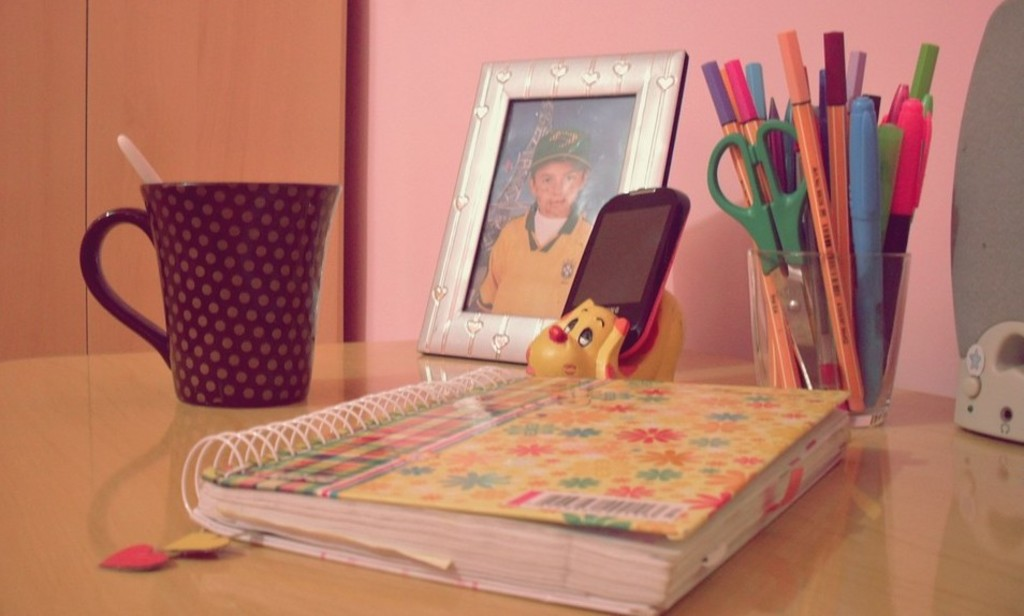

In [22]:
import os
import cv2
import random
from google.colab.patches import cv2_imshow

# Read in a random image from the training directory
train_img = cv2.imread(train_path + random.sample(os.listdir("/content/OIDv4_ToolKit/OID/Dataset/train/"), 1)[0])
print(train_img.shape)
cv2_imshow(train_img)

In [25]:
subset_classes = ["Bowl","Mug", "Plate"]
def get_image_ids(image_folder=None):
    return [os.path.splitext(img_name)[0] for img_name in os.listdir(image_folder) if img_name.endswith(".jpg")]

### Download Detectron2

In [28]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html
     |████████████████████████████████| 6.7MB 925kB/s 
     |████████████████████████████████| 2.2MB 16.1MB/s 
     |████████████████████████████████| 133kB 53.7MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.2.post20201122-cp36-none-any.whl size=44456 sha256=9a24b08065e3220ab4ab5d8c2d07f1ed9e05b772ef929609adbf2911567bf436
  Stored in directory: /root/.cache/pip/wheels/33/7b/ec/59dffd0a0aa995739aad60ac97e70252247e9d17eae69c1cee
  Created wheel for pycocotools: filename=pycocotools-2.0.2-cp36-cp36m-linux_x86_64.whl size=266521 sha256=62b28114e07533d66b69fb36c080ed9c3782b4114155b5e1e822cd324dff0cc4
  Stored in directory: /root/.cache/pip/wheels/68/a5/e7/56401832f23d0b2db351c5b682e466cb4841960b086da65e4e
Successfully built fvcore pycocotools
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<

In [26]:
# Training bounding boxes (1.11G)
!wget https://storage.googleapis.com/openimages/2018_04/train/train-annotations-bbox.csv

# Validating bounding boxes (23.94M)
!wget https://storage.googleapis.com/openimages/v5/validation-annotations-bbox.csv
    
# Testing bounding boxes (73.89M)
!wget https://storage.googleapis.com/openimages/v5/test-annotations-bbox.csv

# Class names of images (11.73K)
!wget https://storage.googleapis.com/openimages/v5/class-descriptions-boxable.csv

--2020-11-22 00:34:22--  https://storage.googleapis.com/openimages/2018_04/train/train-annotations-bbox.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.119.128, 108.177.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1194033454 (1.1G) [text/csv]
Saving to: ‘train-annotations-bbox.csv’

train-annotations-b 100%[===================>]   1.11G  46.2MB/s    in 32s     

2020-11-22 00:34:55 (35.3 MB/s) - ‘train-annotations-bbox.csv’ saved [1194033454/1194033454]

--2020-11-22 00:34:55--  https://storage.googleapis.com/openimages/v5/validation-annotations-bbox.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.218.128, 173.194.79.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25105048 (24

In [29]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger() # this logs Detectron2 information such as what the model is doing when it's training

# import some common libraries
import numpy as np
import pandas as pd
from tqdm import tqdm
import cv2
import random
from google.colab.patches import cv2_imshow

#import some common detectron2 utilities
from detectron2 import model_zoo # a series of pre-trained Detectron2 models: https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md
from detectron2.engine import DefaultPredictor # a default predictor class to make predictions on an image using a trained model
from detectron2.config import get_cfg # a config of "cfg" in Detectron2 is a series of instructions for building a model
from detectron2.utils.visualizer import Visualizer # a class to help visualize Detectron2 predictions on an image
from detectron2.data import MetadataCatalog

### Create functions for formatting annotations 

In [30]:
def format_annotations(image_folder, annotation_file, target_classes=None):
    # Get all image ids from target directory
    image_ids = get_image_ids(image_folder)
    
    # Setup annotation file and classnames
    annot_file = pd.read_csv(annotation_file)
    classes = pd.read_csv("class-descriptions-boxable.csv",
                          names=["LabelName", "ClassName"])
    
    # Create classname column on annotations which converts label codes to string labels
    annot_file["ClassName"] = annot_file["LabelName"].map(classes.set_index("LabelName")["ClassName"])

    # Sort annot_file by "ClassName" for alphabetical labels (used with target_classes)
    annot_file.sort_values(by=["ClassName"], inplace=True)
    
    # Make sure we only get the images we're concerned about
    if target_classes:
        annot_file = annot_file[annot_file["ImageID"].isin(image_ids) & annot_file["ClassName"].isin(target_classes)]
    else:
        annot_file = annot_file[annot_file["ImageID"].isin(image_ids)]
    
    assert len(annot_file.ImageID.unique()) == len(image_ids), "Label unique ImageIDs doesn't match target folder."
   
    # Add ClassID column, e.g. "Bathtub, Toilet" -> 1, 2
    annot_file["ClassName"] = pd.Categorical(annot_file["ClassName"])
    annot_file["ClassID"] = annot_file["ClassName"].cat.codes
    
    return annot_file

In [31]:
import os
val_annots_formatted = format_annotations(image_folder=valid_path,
                                          annotation_file="/content/OIDv4_ToolKit/OID/csv_folder/validation-annotations-bbox.csv",
                                          target_classes=subset_classes) 

val_annots_formatted.head()

ImageID    Source  LabelName  ...  IsInside  ClassName  ClassID
100263  7c455cd7bb04248b  freeform  /m/04kkgm  ...         0       Bowl        0
100262  7c455cd7bb04248b  freeform  /m/04kkgm  ...         0       Bowl        0
74498   5a401476c1a897bb  freeform  /m/04kkgm  ...         0       Bowl        0
158849  c57759fde075ccf9  freeform  /m/04kkgm  ...         0       Bowl        0
100261  7c455cd7bb04248b  freeform  /m/04kkgm  ...         0       Bowl        0

[5 rows x 15 columns]

In [32]:
val_annots_formatted[["ClassName", "ClassID"]]

ClassName  ClassID
100263      Bowl        0
100262      Bowl        0
74498       Bowl        0
158849      Bowl        0
100261      Bowl        0
...          ...      ...
95059      Plate        2
203152     Plate        2
152759     Plate        2
29315      Plate        2
203151     Plate        2

[142 rows x 2 columns]

In [33]:
val_annots_formatted[["XMin", "XMax", "YMin", "YMax"]].head()

XMin      XMax      YMin      YMax
100263  0.460371  0.774107  0.313983  0.565712
100262  0.212990  0.595658  0.411925  0.747850
74498   0.825874  1.000000  0.594113  0.788886
158849  0.000000  0.999882  0.082420  0.913179
100261  0.041627  0.418496  0.282195  0.568289

In [35]:
def rel_to_absolute(bbox, height, width):
    """
    Converts bounding box dimensions from relative to absolute pixel values (Detectron2 style).
    See: https://detectron2.readthedocs.io/modules/structures.html#detectron2.structures.BoxMode
    
    Params
    ------
    bbox (array): relative dimensions of bounding box in format (x0, y0, x1, y1 or Xmin, Ymin, Xmax, Ymax)
    height (int): height of image
    width (int): width of image
    """
    bbox[0] = np.round(np.multiply(bbox[0], width)) # x0
    bbox[1] = np.round(np.multiply(bbox[1], height)) # y0
    bbox[2] = np.round(np.multiply(bbox[2], width)) # x1
    bbox[3] = np.round(np.multiply(bbox[3], height)) # y1
    return [i.astype("object") for i in bbox]

In [36]:
val_annots_formatted.head(100)

ImageID    Source  LabelName  ...  IsInside  ClassName  ClassID
100263  7c455cd7bb04248b  freeform  /m/04kkgm  ...         0       Bowl        0
100262  7c455cd7bb04248b  freeform  /m/04kkgm  ...         0       Bowl        0
74498   5a401476c1a897bb  freeform  /m/04kkgm  ...         0       Bowl        0
158849  c57759fde075ccf9  freeform  /m/04kkgm  ...         0       Bowl        0
100261  7c455cd7bb04248b  freeform  /m/04kkgm  ...         0       Bowl        0
...                  ...       ...        ...  ...       ...        ...      ...
10954   0d3431b3eac4300d  freeform  /m/050gv4  ...         0      Plate        2
23926   1cee18a7a9d72c09  freeform  /m/050gv4  ...         0      Plate        2
29920   246dc610b5ad61d2  freeform  /m/050gv4  ...         0      Plate        2
56361   445a97c7695962b8  freeform  /m/050gv4  ...         0      Plate        2
56362   445a97c7695962b8  freeform  /m/050gv4  ...         0      Plate        2

[100 rows x 15 columns]

### Create Image dictionaries for training and validation sets 


In [37]:
from detectron2.structures import BoxMode
import json
import pprint

def get_image_dicts(image_folder, annotation_file, target_classes=None):
    """
    Create Dectectron2 style labels in the form of a list of dictionaries.
    
    Params
    ------
    image_folder (str): target folder containing images
    annotations (DataFrame): DataFrame of image label data
    target_classes (list): names of target Open Images classes

    Note: image_folder and annotation_file should both relate to the same dataset (this could be improved).
    E.g.
    image_folder = valid_images & annotation_file = valid_annotations (both are for the validation set)
    """
    # Get name of dataset from image_folder 
    dataset_name = str(image_folder)

    # Create dataset specific annotations.
    annotations = format_annotations(image_folder=image_folder, 
                                     annotation_file=annotation_file,
                                     target_classes=target_classes)

    # Get all unique image ids from target folder
    img_ids = get_image_ids(image_folder)

    # Add some verbosity 
    print(f"\nUsing {annotation_file} for annotations...")
    print(f"On dataset: {dataset_name}")
    print("Classes we're using:\n{}".format(annotations["ClassName"].value_counts()))
    print(f"Total number of images: {len(img_ids)}")
    
    # Start creating image dictionaries (Detectron2 style labelling)
    img_dicts = []
    for idx, img in tqdm(enumerate(img_ids)):
        record = {}
        
        # Get image metadata
        file_name = image_folder + img + ".jpg"
        height, width = cv2.imread(file_name).shape[:2]
        img_data = annotations[annotations["ImageID"] == img].reset_index() # reset_index(): important for images
                                                                            # with multiple objects
        # Verbosity for image label troubleshooting
        # print(f"On image: {img}")
        # print(f"Image category: {img_data.ClassID.values}")
        # print(f"Image label: {img_data.ClassName.values}")

        # Update record dictionary
        record["file_name"] = file_name
        record["image_id"] = idx
        record["height"] = height
        record["width"] = width
        
        # Create list of image annotations (labels)
        img_annotations = []
        for i in range(len(img_data)): # this is where we loop through examples with multiple objects in an image
            category_id = img_data.loc[i]["ClassID"].astype("object") # JSON (for evalution) can't take int8 (NumPy type) must be native Python type
            # Get bounding box coordinates in Detectron2 style (x0, y0, x1, y1)
            bbox = np.float32(img_data.loc[i][["XMin", "YMin", "XMax", "YMax"]].values)
            # Convert bbox from relative to absolute pixel dimensions
            bbox = rel_to_absolute(bbox=bbox, height=height, width=width)
            # Setup annot (1 annot = 1 label, there might be more) dictionary
            annot = {
                "bbox": bbox, 
                "bbox_mode": BoxMode.XYXY_ABS, # See: https://detectron2.readthedocs.io/modules/structures.html#detectron2.structures.BoxMode.XYXY_ABS
                "category_id": category_id
            }
            img_annotations.append(annot)
            
        # Update record dictionary with annotations
        record["annotations"] = img_annotations
        
        # Add record dictionary with image annotations to img_dicts list
        img_dicts.append(record)

    # Save img_dicts to JSON for use later
    prefix = "valid" if "valid" in image_folder else "train"
    json_file = os.path.join(image_folder, prefix + "_labels.json")
    print(f"\nSaving labels to: {json_file}...")
    with open(json_file, "w") as f:
      json.dump(img_dicts, f)

    print("Showing an example:")
    pprint.pprint(random.sample(img_dicts, 1))

    # return img labels dictionary
    return img_dicts

In [38]:
val_img_dicts = get_image_dicts(image_folder=valid_path,
                                annotation_file="validation-annotations-bbox.csv",
                                target_classes=subset_classes)

6it [00:00, 57.08it/s]


Using validation-annotations-bbox.csv for annotations...
On dataset: /content/OIDv4_ToolKit/OID/Dataset/validation/
Classes we're using:
Plate    73
Bowl     51
Mug      24
Name: ClassName, dtype: int64
Total number of images: 97


97it [00:01, 55.57it/s]


Saving labels to: /content/OIDv4_ToolKit/OID/Dataset/validation/valid_labels.json...
Showing an example:
[{'annotations': [{'bbox': [29.0, 121.0, 366.0, 331.0],
                   'bbox_mode': <BoxMode.XYXY_ABS: 0>,
                   'category_id': 0},
                  {'bbox': [762.0, 191.0, 902.0, 288.0],
                   'bbox_mode': <BoxMode.XYXY_ABS: 0>,
                   'category_id': 0},
                  {'bbox': [837.0, 160.0, 970.0, 229.0],
                   'bbox_mode': <BoxMode.XYXY_ABS: 0>,
                   'category_id': 0},
                  {'bbox': [890.0, 221.0, 1024.0, 347.0],
                   'bbox_mode': <BoxMode.XYXY_ABS: 0>,
                   'category_id': 0},
                  {'bbox': [958.0, 187.0, 1024.0, 240.0],
                   'bbox_mode': <BoxMode.XYXY_ABS: 0>,
                   'category_id': 0},
                  {'bbox': [0.0, 246.0, 41.0, 360.0],
                   'bbox_mode': <BoxMode.XYXY_ABS: 0>,
                   'category_id': 

In [39]:
# Create list of training image dictionaries
%%time
train_img_dicts = get_image_dicts(image_folder=train_path,
                                  annotation_file="train-annotations-bbox.csv",
                                  target_classes=subset_classes)

6it [00:00, 52.81it/s]


Using train-annotations-bbox.csv for annotations...
On dataset: /content/OIDv4_ToolKit/OID/Dataset/train/
Classes we're using:
Bowl     812
Plate    808
Mug      484
Name: ClassName, dtype: int64
Total number of images: 868


868it [00:16, 51.48it/s]



Saving labels to: /content/OIDv4_ToolKit/OID/Dataset/train/train_labels.json...
Showing an example:
[{'annotations': [{'bbox': [79.0, 12.0, 472.0, 434.0],
                   'bbox_mode': <BoxMode.XYXY_ABS: 0>,
                   'category_id': 1},
                  {'bbox': [458.0, 278.0, 964.0, 679.0],
                   'bbox_mode': <BoxMode.XYXY_ABS: 0>,
                   'category_id': 1}],
  'file_name': '/content/OIDv4_ToolKit/OID/Dataset/train/3bbdc16ad8ac2599.jpg',
  'height': 680,
  'image_id': 805,
  'width': 1024}]
CPU times: user 52.1 s, sys: 2.67 s, total: 54.7 s
Wall time: 54.6 s


In [40]:
def load_json_labels(image_folder):
    """
    Returns Detectron2 style labels of images (list of dictionaries) in image_folder based on JSON label file in image_folder.

    Note: Requires JSON label to be in image_folder. See get_image_dicts(). 
    
    Params
    ------
    image_folder (str): target folder containing images
    """
    # Get absolute path of JSON label file
    for file in os.listdir(image_folder):
      if file.endswith(".json"):
        json_file = os.path.join(image_folder, file)

    # Check to see if json_file exists 
    assert json_file, "No .json label file found, please make one with get_image_dicts()"

    with open(json_file, "r") as f:
      img_dicts = json.load(f)

    # Convert bbox_mode to Enum of BoxMode.XYXY_ABS (doesn't work loading normal from JSON)
    for img_dict in img_dicts:
      for annot in img_dict["annotations"]:
        annot["bbox_mode"] = BoxMode.XYXY_ABS

    return img_dicts

In [41]:
loaded_val_img_dicts = load_json_labels(valid_path)
loaded_val_img_dicts[0]

{'annotations': [{'bbox': [72.0, 194.0, 743.0, 908.0],
   'bbox_mode': <BoxMode.XYXY_ABS: 0>,
   'category_id': 1}],
 'file_name': '/content/OIDv4_ToolKit/OID/Dataset/validation/34aebaebe39bfaf0.jpg',
 'height': 1024,
 'image_id': 0,
 'width': 1024}

In [42]:
loaded_train_img_dicts = load_json_labels(train_path)
loaded_train_img_dicts[0]

{'annotations': [{'bbox': [426.0, 469.0, 680.0, 549.0],
   'bbox_mode': <BoxMode.XYXY_ABS: 0>,
   'category_id': 0},
  {'bbox': [0.0, 316.0, 447.0, 585.0],
   'bbox_mode': <BoxMode.XYXY_ABS: 0>,
   'category_id': 0},
  {'bbox': [434.0, 470.0, 684.0, 512.0],
   'bbox_mode': <BoxMode.XYXY_ABS: 0>,
   'category_id': 0},
  {'bbox': [435.0, 405.0, 686.0, 488.0],
   'bbox_mode': <BoxMode.XYXY_ABS: 0>,
   'category_id': 0},
  {'bbox': [439.0, 460.0, 684.0, 498.0],
   'bbox_mode': <BoxMode.XYXY_ABS: 0>,
   'category_id': 0},
  {'bbox': [682.0, 390.0, 941.0, 516.0],
   'bbox_mode': <BoxMode.XYXY_ABS: 0>,
   'category_id': 2}],
 'file_name': '/content/OIDv4_ToolKit/OID/Dataset/train/17b9486db8f43d5f.jpg',
 'height': 682,
 'image_id': 0,
 'width': 1024}

### Register the train and validation dataset folders

In [43]:
from detectron2.data import DatasetCatalog, MetadataCatalog

# Loop through different datasets
for dataset in ["train", "validation"]:
  
    # Create dataset name strings
    dataset_name = "/content/OIDv4_ToolKit/OID/Dataset/" + dataset
    print(f"Registering {dataset_name}")

    # Register the datasets with Detectron2's DatasetCatalog, which has space for a lambda function to preprocess it
    DatasetCatalog.register(dataset_name, lambda dataset_name=dataset_name: load_json_labels(dataset_name))

    # Create the metadata for our dataset (the main thing being the classnames we're using)
    MetadataCatalog.get(dataset_name).set(thing_classes=subset_classes)

# Setup metadata variable

cutlery_metadata = MetadataCatalog.get("/content/OIDv4_ToolKit/OID/Dataset/train")
# Setup metadata variable

Registering /content/OIDv4_ToolKit/OID/Dataset/train
Registering /content/OIDv4_ToolKit/OID/Dataset/validation


In [44]:
DatasetCatalog._REGISTERED

{'/content/OIDv4_ToolKit/OID/Dataset/train': <function __main__.<lambda>>,
 '/content/OIDv4_ToolKit/OID/Dataset/validation': <function __main__.<lambda>>,
 'cityscapes_fine_instance_seg_test': <function detectron2.data.datasets.builtin.register_all_cityscapes.<locals>.<lambda>>,
 'cityscapes_fine_instance_seg_train': <function detectron2.data.datasets.builtin.register_all_cityscapes.<locals>.<lambda>>,
 'cityscapes_fine_instance_seg_val': <function detectron2.data.datasets.builtin.register_all_cityscapes.<locals>.<lambda>>,
 'cityscapes_fine_sem_seg_test': <function detectron2.data.datasets.builtin.register_all_cityscapes.<locals>.<lambda>>,
 'cityscapes_fine_sem_seg_train': <function detectron2.data.datasets.builtin.register_all_cityscapes.<locals>.<lambda>>,
 'cityscapes_fine_sem_seg_val': <function detectron2.data.datasets.builtin.register_all_cityscapes.<locals>.<lambda>>,
 'coco_2014_minival': <function detectron2.data.datasets.register_coco.register_coco_instances.<locals>.<lambd

In [47]:
%cp -r  /content/OIDv4_ToolKit/OID/Dataset/train /content/drive/MyDrive

In [50]:
%cp -r /content/OIDv4_ToolKit/OID/Dataset/validation /content/drive/MyDrive

### Check to see if the image training dictionary contains the proper labels

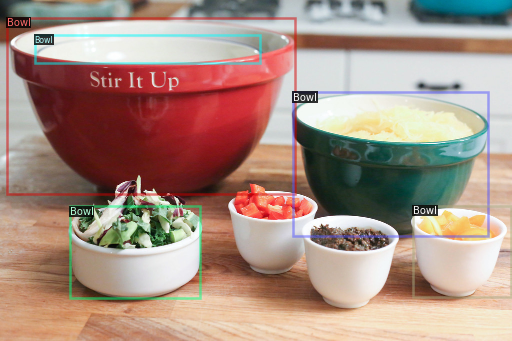

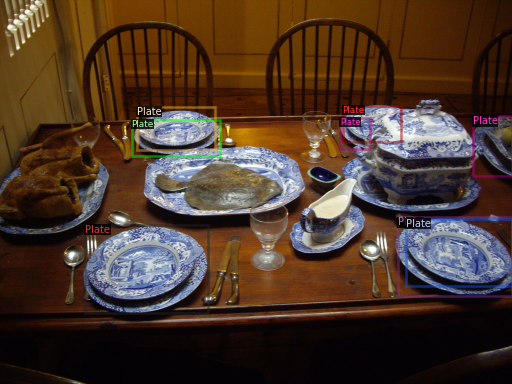

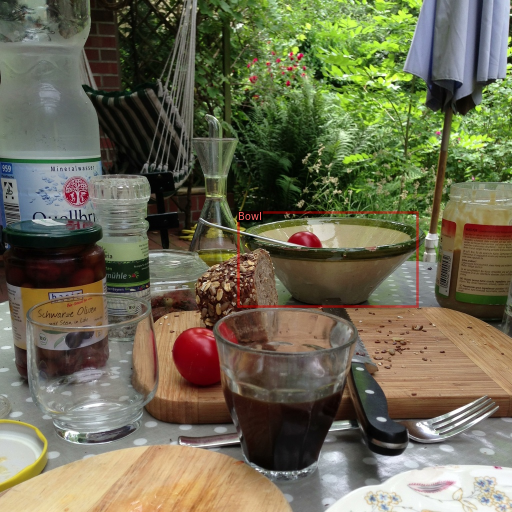

In [51]:
for label in random.sample(train_img_dicts, 3):
    img = cv2.imread(label["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], # revervse the image pixel order (BGR -> RGB)
                            metadata=cutlery_metadata, # use the metadata variable we created about
                            scale=0.5)
    vis = visualizer.draw_dataset_dict(label)
    cv2_imshow(vis.get_image()[:, :, ::-1])

## Part 2: Train and Test the Custom Model


### Use Faster-RCNN as the backbone and train the data 

In [52]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

# Setup a model config (recipe for training a Detectron2 model)
cfg=get_cfg()

# Add some basic instructions for the Detectron2 model from the model_zoo: https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_C4_3x.yaml"))

# Add some pretrained model weights from an object detection model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_C4_3x.yaml")

# Setup datasets to train/validate on (this will only work if the datasets are registered with DatasetCatalog)
cfg.DATASETS.TRAIN = ("/content/OIDv4_ToolKit/OID/Dataset/train",)
cfg.DATASETS.TEST = ("/content/OIDv4_ToolKit/OID/Dataset/validation",)



# How many dataloaders to use? This is the number of CPUs to load the data into Detectron2, Colab has 2, so we'll use 2
cfg.DATALOADER.NUM_WORKERS = 2

# How many images per batch? The original models were trained on 8 GPUs with 16 images per batch, since we have 1 GPU: 16/8 = 2.
cfg.SOLVER.IMS_PER_BATCH = 2

# We do the same calculation with the learning rate as the GPUs, the original model used 0.01, so we'll divide by 8: 0.01/8 = 0.00125.
cfg.SOLVER.BASE_LR = 0.00125

# How many iterations are we going for? (300 is okay for our small model, increase for larger datasets)
cfg.SOLVER.MAX_ITER = 600

# ROI = region of interest, as in, how many parts of an image are interesting, how many of these are we going to find? 
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256

cfg.MODEL.RETINANET.NUM_CLASSES = 3

# Setup output directory, all the model artefacts will get stored here in a folder called "outputs" 
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

# Setup the default Detectron2 trainer, see: https://detectron2.readthedocs.io/modules/engine.html#detectron2.engine.defaults.DefaultTrainer
trainer = DefaultTrainer(cfg)

# Resume training from model checkpoint or not, we're going to just load the model in the config: https://detectron2.readthedocs.io/modules/engine.html#detectron2.engine.defaults.DefaultTrainer.resume_or_load
trainer.resume_or_load(resume=False) 

# Start training
trainer.train()

WARNING [11/22 00:57:39 d2.modeling.backbone.resnet]: ResNet.make_stage(first_stride=) is deprecated!  Use 'stride_per_block' or 'stride' instead.
[11/22 00:57:43 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): ResNet(
    (stem): BasicStem(
      (conv1): Conv2d(
        3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
        (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
      )
    )
    (res2): Sequential(
      (0): BottleneckBlock(
        (shortcut): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
        )
        (conv1): Conv2d(
          64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv2): Conv2d(
          64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (

model_final_298dad.pkl: 212MB [00:20, 10.5MB/s]                           


[11/22 00:58:05 d2.engine.train_loop]: Starting training from iteration 0
[11/22 00:58:13 d2.utils.events]:  eta: 0:03:27  iter: 19  total_loss: 1.758  loss_cls: 1.444  loss_box_reg: 0.176  loss_rpn_cls: 0.122  loss_rpn_loc: 0.038  time: 0.3590  data_time: 0.0127  lr: 0.000025  max_mem: 3959M
[11/22 00:58:20 d2.utils.events]:  eta: 0:03:18  iter: 39  total_loss: 1.609  loss_cls: 1.226  loss_box_reg: 0.147  loss_rpn_cls: 0.159  loss_rpn_loc: 0.055  time: 0.3554  data_time: 0.0049  lr: 0.000050  max_mem: 4022M
[11/22 00:58:27 d2.utils.events]:  eta: 0:03:09  iter: 59  total_loss: 1.174  loss_cls: 0.764  loss_box_reg: 0.195  loss_rpn_cls: 0.090  loss_rpn_loc: 0.096  time: 0.3517  data_time: 0.0048  lr: 0.000075  max_mem: 4022M
[11/22 00:58:34 d2.utils.events]:  eta: 0:03:03  iter: 79  total_loss: 0.859  loss_cls: 0.520  loss_box_reg: 0.158  loss_rpn_cls: 0.076  loss_rpn_loc: 0.066  time: 0.3519  data_time: 0.0051  lr: 0.000100  max_mem: 4022M
[11/22 00:58:41 d2.utils.events]:  eta: 0:02:5

In [53]:
# Get the final model weights from the outputs directory
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth") 

# Set the testing threshold (a value between 0 and 1, higher makes it more difficult for a prediction to be made)
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

# Tell the config what the test dataset is (we've already done this)
cfg.DATASETS.TEST = ("/content/OIDv4_ToolKit/OID/Dataset/validation",) 

# Setup a default predictor from Detectron2: https://detectron2.readthedocs.io/modules/engine.html#detectron2.engine.defaults.DefaultPredictor
predictor = DefaultPredictor(cfg)

WARNING [11/22 01:01:49 d2.modeling.backbone.resnet]: ResNet.make_stage(first_stride=) is deprecated!  Use 'stride_per_block' or 'stride' instead.


### Test new model on validation set 

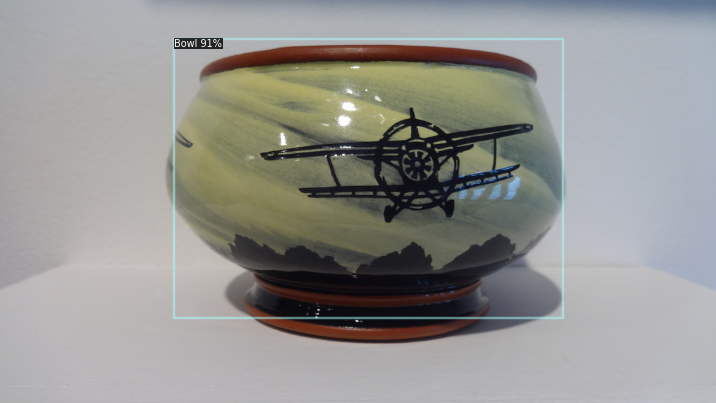

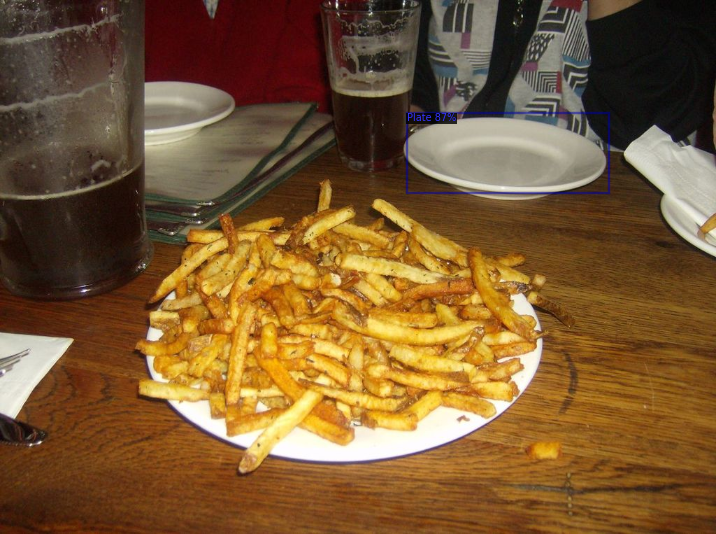

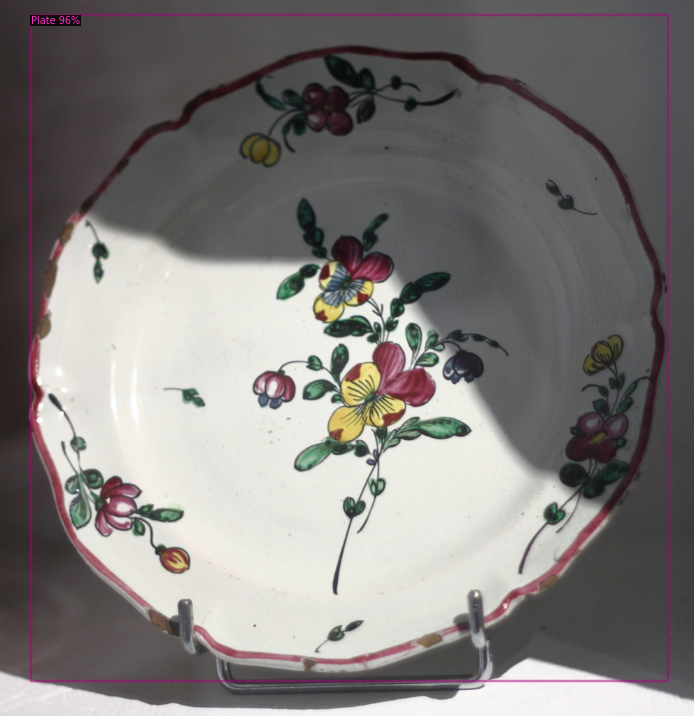

In [56]:
num_amenities = 1 # how many amenity detections to draw on the image 
for label in random.sample(val_img_dicts, 3): # select random samples from the validation set
  img = cv2.imread(label["file_name"])
  outputs = predictor(img)
  visualizer = Visualizer(img[:, :, ::-1],
                          metadata=cutlery_metadata,
                          scale=0.7)
  visualizer = visualizer.draw_instance_predictions(outputs["instances"][:num_amenities].to("cpu"))
  cv2_imshow(visualizer.get_image()[:, :, ::-1])

### Get Coco Evaluation Metrics

In [57]:
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
predictor = DefaultPredictor(cfg)
evaluator = COCOEvaluator("/content/OIDv4_ToolKit/OID/Dataset/validation", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "/content/OIDv4_ToolKit/OID/Dataset/validation")
inference_on_dataset(trainer.model, val_loader, evaluator)

WARNING [11/22 01:02:44 d2.modeling.backbone.resnet]: ResNet.make_stage(first_stride=) is deprecated!  Use 'stride_per_block' or 'stride' instead.
[11/22 01:02:44 d2.evaluation.coco_evaluation]: '/content/OIDv4_ToolKit/OID/Dataset/validation' is not registered by `register_coco_instances`. Therefore trying to convert it to COCO format ...
[11/22 01:02:44 d2.data.datasets.coco]: Converting annotations of dataset '/content/OIDv4_ToolKit/OID/Dataset/validation' to COCO format ...)
[11/22 01:02:44 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[11/22 01:02:44 d2.data.datasets.coco]: Conversion finished, #images: 97, #annotations: 148
[11/22 01:02:44 d2.data.datasets.coco]: Caching COCO format annotations at '/content/OIDv4_ToolKit/OID/Dataset/validation_coco_format.json' ...
[11/22 01:02:44 d2.data.common]: Serializing 97 elements to byte tensors and concatenating them all ...
[11/22 01:02:44 d2.data.common]: Serialized dataset takes 0.03 MiB
[11/22 01:02:44 d2.data.data

OrderedDict([('bbox',
              {'AP': 60.42033492632719,
               'AP-Bowl': 55.4328170687232,
               'AP-Mug': 75.79478135430925,
               'AP-Plate': 50.033406355949126,
               'AP50': 72.35341220873515,
               'AP75': 69.12396448582089,
               'APl': 62.362519297617105,
               'APm': 7.80671545415411,
               'APs': nan})])

In [58]:
with open("output/config.yaml", "w") as f:
    f.write(cfg.dump())

In [59]:
# Make a prediction and display inferences
def make_inference(image, model_config, model_weights, threshold=0.3, n=5):

  # Setup config
  cfg = get_cfg()
  cfg.merge_from_file(model_config)
  cfg.MODEL.WEIGHTS = model_weights
  cfg.MODEL.SCORE_THRESH_TEST = threshold

  # Setup predictor
  predictor = DefaultPredictor(cfg)
  img = cv2.imread(image)
  visualizer = Visualizer(img_rgb=img[:, :, ::-1],
                          metadata=MetadataCatalog.get(cfg.DATASETS.TEST[0]),
                          scale=0.7)
  
  outputs = predictor(img) # Outputs: https://detectron2.readthedocs.io/modules/structures.html#detectron2.structures.Instances
  
  # Draw on predictions to image
  visualizer = visualizer.draw_instance_predictions(outputs["instances"][:n].to("cpu"))
  cv2_imshow(visualizer.get_image()[:, :, ::-1])

### Test on random image from internet

--2020-11-22 01:03:33--  https://images.crateandbarrel.com/is/image/Crate/PrimroseGoldMugSSF20/$/200603141358/primrose-gold-mug.jpg
Resolving images.crateandbarrel.com (images.crateandbarrel.com)... 184.50.173.133
Connecting to images.crateandbarrel.com (images.crateandbarrel.com)|184.50.173.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21183 (21K) [image/jpeg]
Saving to: ‘primrose-gold-mug.jpg’

primrose-gold-mug.j 100%[===================>]  20.69K  --.-KB/s    in 0.004s  

2020-11-22 01:03:33 (5.74 MB/s) - ‘primrose-gold-mug.jpg’ saved [21183/21183]



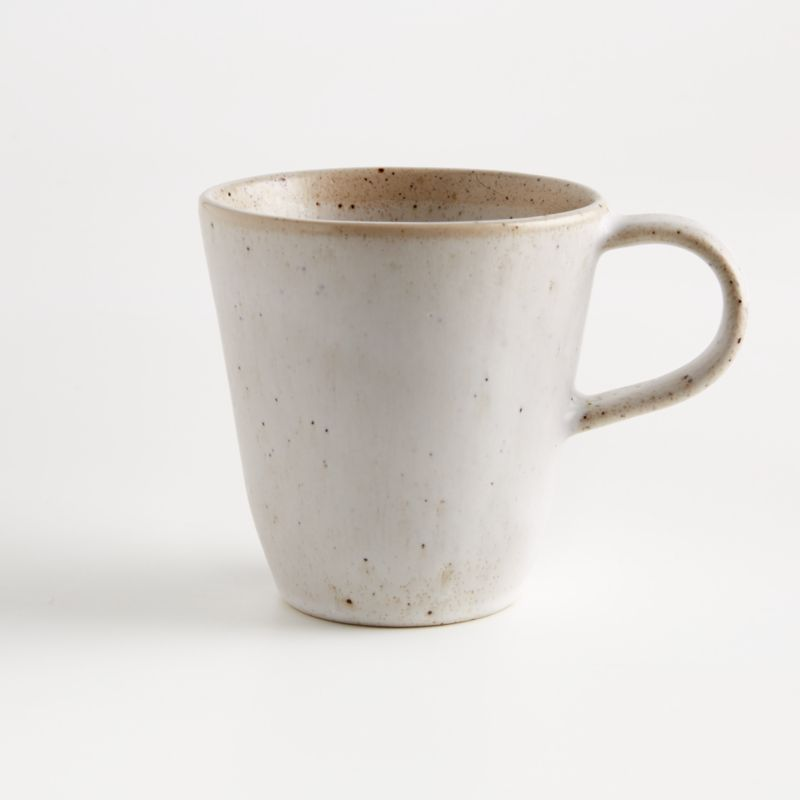

In [60]:
!wget https://images.crateandbarrel.com/is/image/Crate/PrimroseGoldMugSSF20/$web_pdp_main_carousel_high$/200603141358/primrose-gold-mug.jpg
cmaker = cv2.imread("primrose-gold-mug.jpg")
cv2_imshow(cmaker)

### Prediction using our custom model

WARNING [11/22 01:03:38 d2.modeling.backbone.resnet]: ResNet.make_stage(first_stride=) is deprecated!  Use 'stride_per_block' or 'stride' instead.


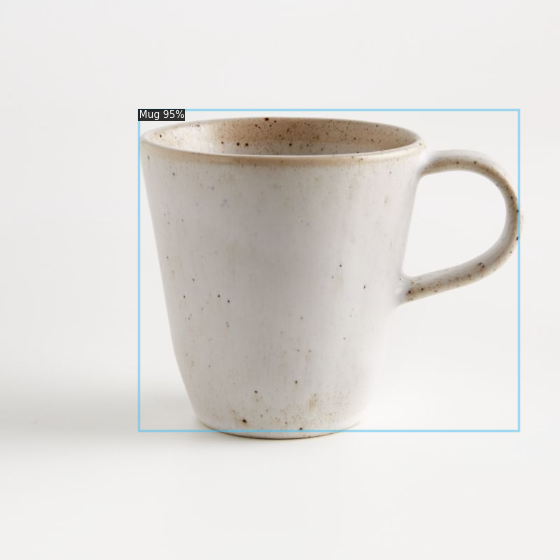

In [61]:
make_inference("primrose-gold-mug.jpg",
               model_config="output/config.yaml",
               model_weights="output/model_final.pth",
               n=1)

### Prediction using generic model

Loading config /usr/local/lib/python3.6/dist-packages/detectron2/model_zoo/configs/COCO-Detection/../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.
model_final_5bd44e.pkl: 152MB [00:15, 9.76MB/s]                           


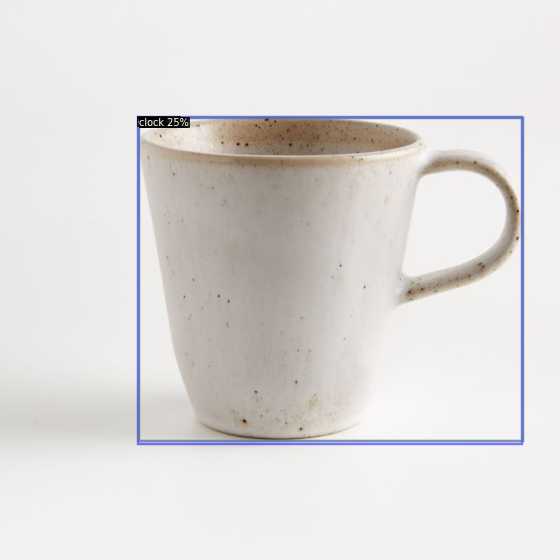

In [62]:
make_inference("primrose-gold-mug.jpg",
               model_config=model_zoo.get_config_file("COCO-Detection/retinanet_R_50_FPN_3x.yaml"),
               model_weights=model_zoo.get_checkpoint_url("COCO-Detection/retinanet_R_50_FPN_3x.yaml"),
               n=3)

### Save the Model's Configuration so You Can Run Again

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
!cp -r /content/OIDv4_ToolKit/output /content/drive/MyDrive/savedmodelhw2

I then downloaded the output folder and put it into github.

## Conclusion

From looking at our custom model's prediction of 91% of a mug vs the generic model's prediciton, (25% clock), its clear that our model is able to distinguish mugs better than the generic model.

## Part 3: Run this model using your own images and videos

To run the model using your own images, you need to run the code below (make sure to restart runtime).  You will need to download the requirements for Detectron2 as well as Detectron2 code and also get the saved output files I created when saving this model.

I have saved the saved model within my google drive and access it when I make an inference.   I have also included the saved model files here:     . To run it exactly, I would download my saved model files and upload to your own google drive. 

In [ ]:
!pip install -U torch==1.4+cu100 torchvision==0.5+cu100 -f https://download.pytorch.org/whl/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
!pip install awscli
import torch, torchvision
torch.__version__
!gcc --version

Looking in links: https://download.pytorch.org/whl/torch_stable.html
Requirement already up-to-date: torch==1.4+cu100 in /usr/local/lib/python3.6/dist-packages (1.4.0+cu100)
Requirement already up-to-date: torchvision==0.5+cu100 in /usr/local/lib/python3.6/dist-packages (0.5.0+cu100)
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-ndcawn5u
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-ndcawn5u
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-linux_x86_64.whl size=266459 sha256=6bb1b7c9e0e9a2dcf17a130c3f1cfc8dfdecfb612747828b709e9a4028b7025f
  Stored in directory: /tmp/pip-ephem-wheel-cache-63jfi0pl/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a
Successfully built pycocotools
ERROR: detectron2 0.2.1+cu100 has requirement pycocotools>=2.0.1, but you'll have pycocotools 2.0 which is incompatible.
  Found existing installation: pycocotools 2.0.2
    Uninstalling pycocotools-2.0

In [ ]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html
Processing /root/.cache/pip/wheels/68/a5/e7/56401832f23d0b2db351c5b682e466cb4841960b086da65e4e/pycocotools-2.0.2-cp36-cp36m-linux_x86_64.whl
  Found existing installation: pycocotools 2.0
    Uninstalling pycocotools-2.0:
      Successfully uninstalled pycocotools-2.0


In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger() # this logs Detectron2 information such as what the model is doing when it's training

# import some common libraries
import numpy as np
import pandas as pd
from tqdm import tqdm
import cv2
import random
from google.colab.patches import cv2_imshow

#import some common detectron2 utilities
from detectron2 import model_zoo # a series of pre-trained Detectron2 models: https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md
from detectron2.engine import DefaultPredictor # a default predictor class to make predictions on an image using a trained model
from detectron2.config import get_cfg # a config of "cfg" in Detectron2 is a series of instructions for building a model
from detectron2.utils.visualizer import Visualizer # a class to help visualize Detectron2 predictions on an image
from detectron2.data import MetadataCatalog

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#!cp '/content/gdrive/My Drive/<file_path_on_google_drive>' <filename_in_colabo>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
from detectron2.data.catalog import Metadata

my_metadata = Metadata()
my_metadata.set(thing_classes = ['Bowl', 'Mug','Plate'])

Metadata(thing_classes=['Bowl', 'Mug', 'Plate'])

In [ ]:
# Make a prediction and display inferences
def make_inference(image, model_config, model_weights, threshold=0.3, n=5):

  # Setup config
  cfg = get_cfg()
  cfg.merge_from_file(model_config)
  cfg.MODEL.WEIGHTS = model_weights
  cfg.MODEL.SCORE_THRESH_TEST = threshold

  # Setup predictor
  predictor = DefaultPredictor(cfg)
  img = cv2.imread(image)
  visualizer = Visualizer(img_rgb=img[:, :, ::-1],
                          metadata=my_metadata,
                          scale=0.7)
  
  outputs = predictor(img) # Outputs: https://detectron2.readthedocs.io/modules/structures.html#detectron2.structures.Instances
  
  # Draw on predictions to image
  visualizer = visualizer.draw_instance_predictions(outputs["instances"][:n].to("cpu"))
  cv2_imshow(visualizer.get_image()[:, :, ::-1])

--2020-11-17 23:57:14--  https://images.crateandbarrel.com/is/image/Crate/LilouMatteWhtRidgedBwlLrgSSF20/$/200317144537/lilou-lg-matte-white-mixing-bowl.jpg
Resolving images.crateandbarrel.com (images.crateandbarrel.com)... 23.52.51.48
Connecting to images.crateandbarrel.com (images.crateandbarrel.com)|23.52.51.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33962 (33K) [image/jpeg]
Saving to: ‘lilou-lg-matte-white-mixing-bowl.jpg’

lilou-lg-matte-whit 100%[===================>]  33.17K  70.9KB/s    in 0.5s    

2020-11-17 23:57:15 (70.9 KB/s) - ‘lilou-lg-matte-white-mixing-bowl.jpg’ saved [33962/33962]



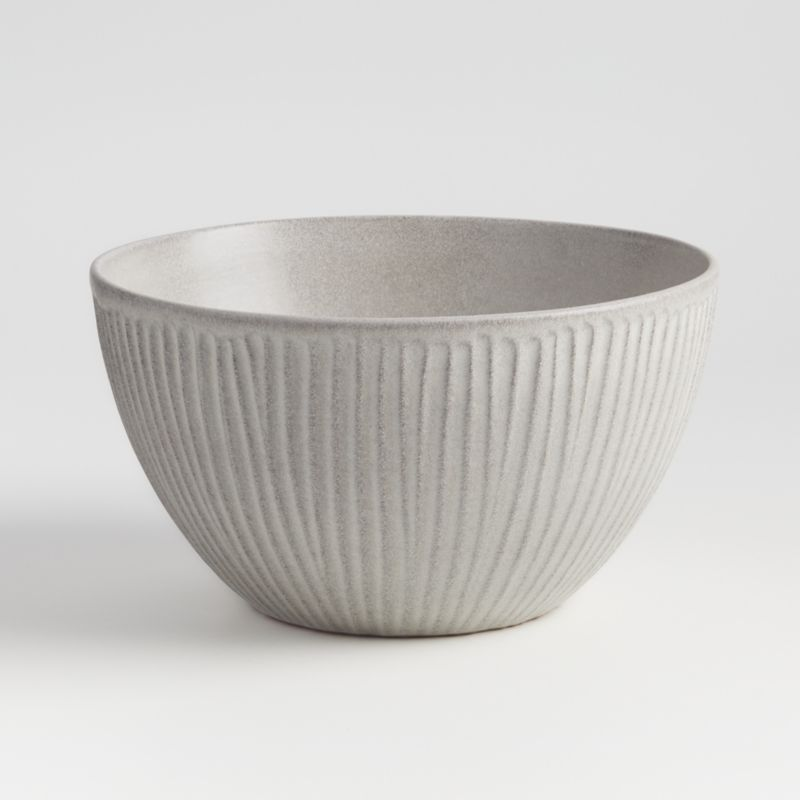

In [ ]:
!wget https://images.crateandbarrel.com/is/image/Crate/LilouMatteWhtRidgedBwlLrgSSF20/$web_pdp_main_carousel_high$/200317144537/lilou-lg-matte-white-mixing-bowl.jpg
cmaker = cv2.imread("lilou-lg-matte-white-mixing-bowl.jpg")
cv2_imshow(cmaker)

WARNING [11/17 23:58:11 d2.modeling.backbone.resnet]: ResNet.make_stage(first_stride=) is deprecated!  Use 'stride_per_block' or 'stride' instead.


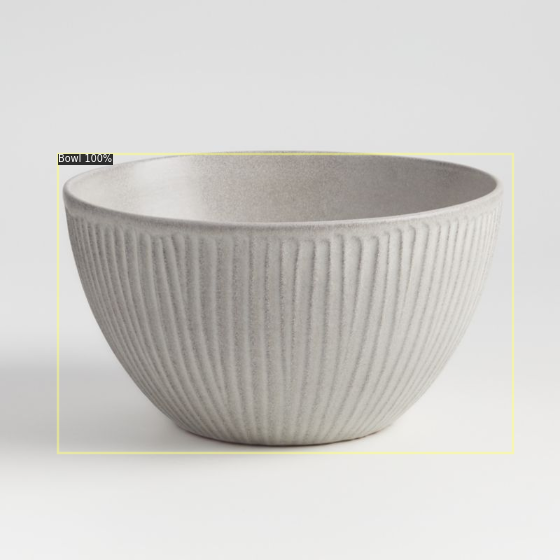

In [ ]:
###substitute here with your path to the config.yaml and model_final.pth file"
make_inference("lilou-lg-matte-white-mixing-bowl.jpg",
               model_config="/content/drive/MyDrive/savedmodel/config.yaml",
               model_weights="/content/drive/MyDrive/savedmodel/model_final.pth",
               n=1)



### Using Video and GStreamer/CV2

To optimize the inference pipeline, I had to re-install cv2 so that it would include. I then was able to enable GStreamer in open CV and process the mug video.


### Installation of GStreamer

In [ ]:
!sudo apt install libgstreamer1.0-dev libgstreamer-plugins-base1.0-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgstreamer-plugins-base1.0-dev is already the newest version (1.14.5-0ubuntu1~18.04.1).
libgstreamer1.0-dev is already the newest version (1.14.5-0ubuntu1~18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [ ]:
!sudo apt-get install libopencv-*

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'libopencv-photo3.2' for glob 'libopencv-*'
Note, selecting 'libopencv-core-dev' for glob 'libopencv-*'
Note, selecting 'libopencv-gpu-dev' for glob 'libopencv-*'
Note, selecting 'libopencv-apps0d' for glob 'libopencv-*'
Note, selecting 'libopencv-video3.2' for glob 'libopencv-*'
Note, selecting 'libopencv-calib3d-dev' for glob 'libopencv-*'
Note, selecting 'libopencv-ml-dev' for glob 'libopencv-*'
Note, selecting 'libopencv-imgcodecs3.2' for glob 'libopencv-*'
Note, selecting 'libopencv-shape-dev' for glob 'libopencv-*'
Note, selecting 'libopencv-imgcodecs-dev' for glob 'libopencv-*'
Note, selecting 'libopencv-apps-dev' for glob 'libopencv-*'
Note, selecting 'libopencv-highgui3.2' for glob 'libopencv-*'
Note, selecting 'libopencv-calib3d3.2' for glob 'libopencv-*'
Note, selecting 'libopencv-ml3.2' for glob 'libopencv-*'
Note, selecting 'libopencv-imgproc3.2' for glob 'libope

In [ ]:
%rm -rf /content/opencv

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory


In [ ]:
%rm -rf /content/opencv_contrib

In [ ]:
%rm -rf /content/build

In [ ]:
!git clone https://github.com/opencv/opencv.git
%cd opencv/
!git checkout 4.5.0

Cloning into 'opencv'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 282836 (delta 2), reused 14 (delta 1), pack-reused 282792
Receiving objects: 100% (282836/282836), 474.93 MiB | 30.99 MiB/s, done.
Resolving deltas: 100% (197531/197531), done.
Checking out files: 100% (6705/6705), done.
/content/opencv
Note: checking out '4.5.0'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at d5fd2f0155 release: OpenCV 4.5.0


In [ ]:
!mkdir /content/build
%cd /content/build

!cmake -D CMAKE_BUILD_TYPE=RELEASE \
-D INSTALL_PYTHON_EXAMPLES=ON \
-D INSTALL_C_EXAMPLES=OFF \
-D PYTHON_EXECUTABLE=$(which python3) \
-D BUILD_opencv_python2=OFF \
-D WITH_GSTREAMER=ON \
-D BUILD_EXAMPLES=ON .. /content/opencv

mkdir: cannot create directory ‘/content/build’: File exists
/content/build
-- The CXX compiler identification is GNU 7.5.0
-- The C compiler identification is GNU 7.5.0
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Detected processor: x86_64
-- Found PythonInterp: /usr/bin/python3 (found suitable version "3.6.9", minimum required is "2.7") 
CMake Warning at cmake/OpenCVDetectPython.cmake:81 (message):
  CMake's 'find_host_package(PythonInterp 2.7)' found wrong Python version:

  PYTHON_EXECUTABLE=/usr/bin/python3

  PYTHON_VERSION_STRIN

In [ ]:
%pwd

'/content/build'

In [ ]:
!make -j8 install

Scanning dependencies of target libopenjp2
Scanning dependencies of target ippiw
Scanning dependencies of target quirc
Scanning dependencies of target ade
Scanning dependencies of target ittnotify
Scanning dependencies of target libwebp
Scanning dependencies of target libprotobuf
Scanning dependencies of target opencv_videoio_plugins
[  0%] Building C object 3rdparty/quirc/CMakeFiles/quirc.dir/src/decode.c.o
[  0%] Built target opencv_videoio_plugins
[  0%] Building C object 3rdparty/ittnotify/CMakeFiles/ittnotify.dir/src/ittnotify/ittnotify_static.c.o
[  0%] Building CXX object modules/CMakeFiles/ade.dir/__/3rdparty/ade/ade-0.1.1f/sources/ade/source/alloc.cpp.o
[  0%] Building C object 3rdparty/ittnotify/CMakeFiles/ittnotify.dir/src/ittnotify/jitprofiling.c.o
[  0%] Building C object 3rdparty/openjpeg/openjp2/CMakeFiles/libopenjp2.dir/thread.c.o
[  0%] Building C object 3rdparty/ippiw/CMakeFiles/ippiw.dir/src/iw_core.c.o
[  0%] Building C object 3rdparty/libwebp/CMakeFiles/libwebp.dir

In [ ]:
!mkdir  "/content/drive/MyDrive/cv2_gstreamer"
!cp  /content/build/lib/python3/cv2.cpython-36m-x86_64-linux-gnu.so   "/content/drive/MyDrive/cv2_gstreamer"

In [ ]:
!cp "/content/gdrive/My Drive/cv2_gpu/cv2.cpython-36m-x86_64-linux-gnu.so"

cp: missing destination file operand after '/content/gdrive/My Drive/cv2_gpu/cv2.cpython-36m-x86_64-linux-gnu.so'
Try 'cp --help' for more information.


In [ ]:
!sudo pip uninstall opencv-python

Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/cv2/*
    /usr/local/lib/python3.6/dist-packages/opencv_python-4.1.2.30.dist-info/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.6/dist-packages/cv2/config-3.6.py
    /usr/local/lib/python3.6/dist-packages/cv2/config.py
    /usr/local/lib/python3.6/dist-packages/cv2/load_config_py2.py
    /usr/local/lib/python3.6/dist-packages/cv2/load_config_py3.py
    /usr/local/lib/python3.6/dist-packages/cv2/python-3.6/cv2.cpython-36m-x86_64-linux-gnu.so
Proceed (y/n)? y
  Successfully uninstalled opencv-python-4.1.2.30


In [ ]:
import cv2
print(cv2.getBuildInformation())


General configuration for OpenCV 4.5.0 =====================================
  Version control:               4.5.0

  Platform:
    Timestamp:                   2020-11-21T01:02:12Z
    Host:                        Linux 4.19.112+ x86_64
    CMake:                       3.12.0
    CMake generator:             Unix Makefiles
    CMake build tool:            /usr/bin/make
    Configuration:               RELEASE

  CPU/HW features:
    Baseline:                    SSE SSE2 SSE3
      requested:                 SSE3
    Dispatched code generation:  SSE4_1 SSE4_2 FP16 AVX AVX2 AVX512_SKX
      requested:                 SSE4_1 SSE4_2 AVX FP16 AVX2 AVX512_SKX
      SSE4_1 (17 files):         + SSSE3 SSE4_1
      SSE4_2 (2 files):          + SSSE3 SSE4_1 POPCNT SSE4_2
      FP16 (1 files):            + SSSE3 SSE4_1 POPCNT SSE4_2 FP16 AVX
      AVX (5 files):             + SSSE3 SSE4_1 POPCNT SSE4_2 AVX
      AVX2 (31 files):           + SSSE3 SSE4_1 POPCNT SSE4_2 FP16 FMA3 AVX AVX2
      A

In [74]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger() # this logs Detectron2 information such as what the model is doing when it's training
import time


# import some common libraries
import numpy as np
import pandas as pd
from tqdm import tqdm
import random
from google.colab.patches import cv2_imshow

#import some common detectron2 utilities
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
# import some common libraries
import numpy as np
import tqdm
import cv2
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.video_visualizer import VideoVisualizer
from detectron2.utils.visualizer import ColorMode, Visualizer
from detectron2.data import MetadataCatalog
import time

# Extract video properties
video = cv2.VideoCapture('/content/drive/MyDrive/mugs.mov')

#cv2.VideoCapture('filesrc location=Calibration_footage.mp4 ! qtdemux ! queue ! h264parse ! omxh264dec ! nvvidconv ! video/x-raw,format=BGRx ! queue ! videoconvert ! queue ! video/x-raw, format=BGR ! appsink', cv2.CAP_GSTREAMER)
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
frames_per_second = video.get(cv2.CAP_PROP_FPS)
num_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
formatted_float = "{:.2f}".format(frames_per_second)
print("HERE")
print(formatted_float)
# Initialize video writer
video_writer = cv2.VideoWriter('/content/outgstream.mp4', fourcc=cv2.VideoWriter_fourcc(*'XVID'), fps=float(frames_per_second), frameSize=(width, height), isColor=True)

# Initialize predictor
cfg = get_cfg()
#cfg.merge_from_file(model_zoo.get_config_file(""))
#cfg = get_cfg()
cfg.merge_from_file("/content/drive/MyDrive/savedmodel/config.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/savedmodel/model_final.pth"
predictor = DefaultPredictor(cfg)

# Initialize visualizer
v = VideoVisualizer(my_metadata, ColorMode.IMAGE)

def runOnVideo(video, maxFrames):
    """ Runs the predictor on every frame in the video (unless maxFrames is given),
    and returns the frame with the predictions drawn.
    """
    readFrames = 0
    while True:
        hasFrame, frame = video.read()
        print("")
        if not hasFrame:
            break
        
        # Get prediction results for this frame
        outputs = predictor(frame)
        print(outputs)
        # Make sure the frame is colored
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

        # Draw a visualization of the predictions using the video visualizer
        visualization = v.draw_instance_predictions(frame, outputs["instances"].to("cpu"))

        # Convert Matplotlib RGB format to OpenCV BGR format
        visualization = cv2.cvtColor(visualization.get_image(), cv2.COLOR_RGB2BGR)

        yield visualization

        readFrames += 1
        if readFrames > maxFrames:
            break

# Create a cut-off for debugging
num_frames = 240
start = time.time()
for visualization in tqdm.tqdm(runOnVideo(video, num_frames), total=num_frames):
    # Write test image
    cv2.imwrite('POSE detectron2.png', visualization)
    # Write to video file
    video_writer.write(visualization)

# Release resources
video.release()
video_writer.release()
end = time.time()
print("time to run")
print(end - start)

HERE
58.38
WARNING [11/22 01:34:23 d2.modeling.backbone.resnet]: ResNet.make_stage(first_stride=) is deprecated!  Use 'stride_per_block' or 'stride' instead.


  0%|          | 0/240 [00:00<?, ?it/s]


{'instances': Instances(num_instances=2, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1169.3835,  505.6609, 1603.8177,  778.6974],
        [ 815.4106,  149.4550, 1352.0354,  449.8455]], device='cuda:0')), scores: tensor([0.9867, 0.6641], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}


  0%|          | 1/240 [00:00<01:49,  2.18it/s]


{'instances': Instances(num_instances=2, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1169.5809,  505.6250, 1603.8145,  778.8083],
        [ 815.7513,  151.0089, 1352.2885,  450.0316]], device='cuda:0')), scores: tensor([0.9867, 0.6642], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}


  1%|          | 2/240 [00:00<01:36,  2.48it/s]


{'instances': Instances(num_instances=2, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1169.5325,  505.6492, 1603.9257,  778.8664],
        [ 814.8300,  149.5902, 1352.0376,  450.1495]], device='cuda:0')), scores: tensor([0.9868, 0.6724], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}


  1%|▏         | 3/240 [00:01<01:26,  2.75it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1164.0653,  497.2575, 1603.7889,  763.4318],
        [ 809.9047,  147.9678, 1349.8634,  439.9256],
        [  30.5159,  226.8065, 1108.4897,  935.4850]], device='cuda:0')), scores: tensor([0.9867, 0.6713, 0.5020], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


  2%|▏         | 4/240 [00:01<01:20,  2.94it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1164.1517,  497.2632, 1603.7595,  763.4484],
        [ 810.7586,  154.8222, 1350.0748,  439.7609],
        [  30.8089,  226.6856, 1107.9509,  935.4897]], device='cuda:0')), scores: tensor([0.9869, 0.6966, 0.5008], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


  2%|▏         | 5/240 [00:01<01:15,  3.10it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1159.9745,  495.3947, 1596.5096,  761.8633],
        [ 814.7066,  189.3639, 1348.8116,  439.0059],
        [  13.2321,  167.4286, 1106.2185,  963.1898]], device='cuda:0')), scores: tensor([0.9873, 0.7668, 0.6250], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


  2%|▎         | 6/240 [00:01<01:12,  3.24it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1160.0853,  495.3272, 1596.2570,  761.9625],
        [ 813.1609,  184.9124, 1348.8173,  439.0318],
        [  12.9842,  167.6422, 1104.9720,  963.3464]], device='cuda:0')), scores: tensor([0.9873, 0.7238, 0.6280], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


  3%|▎         | 7/240 [00:02<01:09,  3.35it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1153.3416,  495.6014, 1597.4620,  765.6642],
        [ 804.6147,  130.7304, 1339.5677,  441.0472],
        [  16.1659,  165.6568, 1104.3624,  952.7465]], device='cuda:0')), scores: tensor([0.9887, 0.6731, 0.6102], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


  3%|▎         | 8/240 [00:02<01:07,  3.42it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1153.1381,  495.9337, 1597.8848,  765.2003],
        [ 805.9867,  130.4210, 1339.3214,  441.1472],
        [  16.1107,  165.0653, 1102.3361,  954.1785]], device='cuda:0')), scores: tensor([0.9885, 0.6852, 0.6106], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


  4%|▍         | 9/240 [00:02<01:06,  3.45it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1153.3083,  495.8849, 1598.0563,  765.4423],
        [ 804.7202,  131.5732, 1339.6875,  441.2420],
        [  16.3020,  164.9436, 1104.7185,  953.0886]], device='cuda:0')), scores: tensor([0.9886, 0.6658, 0.6068], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


  4%|▍         | 10/240 [00:02<01:06,  3.48it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1147.5026,  500.3295, 1590.0587,  772.2001],
        [  14.5888,  166.9607, 1094.3674,  955.0309],
        [ 801.2296,  140.5600, 1336.1846,  447.0904]], device='cuda:0')), scores: tensor([0.9872, 0.6692, 0.6667], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


  5%|▍         | 11/240 [00:03<01:05,  3.52it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1147.8091,  500.2796, 1589.9135,  772.3165],
        [  14.4177,  166.0412, 1093.8668,  956.2782],
        [ 801.0068,  137.5026, 1333.2859,  452.7035]], device='cuda:0')), scores: tensor([0.9868, 0.6774, 0.6064], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


  5%|▌         | 12/240 [00:03<01:04,  3.52it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1145.2731,  502.9172, 1583.1185,  771.8560],
        [  16.2912,  167.4199, 1094.5968,  951.0895],
        [ 810.4335,  135.3346, 1323.3678,  451.1476]], device='cuda:0')), scores: tensor([0.9870, 0.6319, 0.5753], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


  5%|▌         | 13/240 [00:03<01:04,  3.51it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1145.2831,  502.9605, 1583.2690,  772.1533],
        [ 788.0508,  130.3210, 1335.8372,  455.8453],
        [  27.6374,  178.4888, 1091.1444,  923.3616]], device='cuda:0')), scores: tensor([0.9872, 0.6482, 0.5508], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


  6%|▌         | 14/240 [00:04<01:04,  3.50it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1145.3822,  503.1325, 1583.1136,  771.9775],
        [  15.9097,  167.2433, 1095.8224,  948.5303],
        [ 809.6754,  131.9433, 1323.6455,  451.5458]], device='cuda:0')), scores: tensor([0.9875, 0.6386, 0.5760], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


  6%|▋         | 15/240 [00:04<01:15,  2.99it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1156.4457,  507.1837, 1592.1423,  779.9343],
        [  31.8578,  175.5965, 1086.8497,  910.9243],
        [ 803.6664,  143.6308, 1342.7997,  456.8592]], device='cuda:0')), scores: tensor([0.9884, 0.6030, 0.5031], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


  7%|▋         | 16/240 [00:04<01:10,  3.17it/s]


{'instances': Instances(num_instances=2, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1156.2952,  506.9339, 1592.3538,  779.9289],
        [  31.1120,  174.8258, 1089.5791,  911.4714]], device='cuda:0')), scores: tensor([0.9881, 0.6067], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}


  7%|▋         | 17/240 [00:05<01:06,  3.34it/s]


{'instances': Instances(num_instances=2, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1161.0897,  507.9236, 1592.8033,  777.8159],
        [  25.3369,  180.1109, 1100.5114,  902.8365]], device='cuda:0')), scores: tensor([0.9869, 0.5715], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}


  8%|▊         | 18/240 [00:05<01:05,  3.41it/s]


{'instances': Instances(num_instances=2, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1161.3461,  507.8542, 1592.7325,  777.2567],
        [  29.4841,  182.2430, 1102.4900,  899.4949]], device='cuda:0')), scores: tensor([0.9863, 0.5967], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}


  8%|▊         | 19/240 [00:05<01:03,  3.50it/s]


{'instances': Instances(num_instances=2, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1160.2501,  507.8669, 1592.6616,  781.4590],
        [  20.2863,  196.1387, 1099.5293,  911.4820]], device='cuda:0')), scores: tensor([0.9877, 0.5403], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}


  8%|▊         | 20/240 [00:05<01:01,  3.55it/s]


{'instances': Instances(num_instances=2, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1161.3398,  508.1458, 1595.2092,  782.8362],
        [  27.1745,  186.5337, 1072.0729,  926.4092]], device='cuda:0')), scores: tensor([0.9867, 0.6032], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}


  9%|▉         | 21/240 [00:06<01:00,  3.60it/s]


{'instances': Instances(num_instances=2, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1161.6157,  508.0602, 1595.1516,  783.1649],
        [  24.5028,  183.6937, 1057.6078,  967.2662]], device='cuda:0')), scores: tensor([0.9861, 0.6133], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}


  9%|▉         | 22/240 [00:06<00:59,  3.64it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1156.8990,  512.1303, 1597.5032,  782.4604],
        [  22.0876,  180.4865, 1037.6722,  975.3705],
        [ 821.1267,  149.8333, 1338.6259,  453.0041]], device='cuda:0')), scores: tensor([0.9874, 0.5592, 0.5287], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 10%|▉         | 23/240 [00:06<01:00,  3.61it/s]


{'instances': Instances(num_instances=2, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1157.3894,  512.4052, 1597.3375,  782.4126],
        [ 822.9089,  154.7211, 1339.8160,  452.8242]], device='cuda:0')), scores: tensor([0.9876, 0.5490], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}


 10%|█         | 24/240 [00:06<00:58,  3.67it/s]


{'instances': Instances(num_instances=2, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1159.6827,  515.7562, 1598.8182,  782.9321],
        [  28.0788,  189.2359, 1094.7157,  917.4919]], device='cuda:0')), scores: tensor([0.9885, 0.5219], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}


 10%|█         | 25/240 [00:07<00:58,  3.67it/s]


{'instances': Instances(num_instances=2, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1160.6652,  516.4161, 1594.3005,  782.3992],
        [  24.8407,  208.9744, 1105.2056,  913.8953]], device='cuda:0')), scores: tensor([0.9884, 0.5219], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}


 11%|█         | 26/240 [00:07<00:58,  3.68it/s]


{'instances': Instances(num_instances=2, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1160.5109,  516.5828, 1594.1433,  782.2784],
        [  28.3037,  189.3452, 1092.7645,  918.7778]], device='cuda:0')), scores: tensor([0.9886, 0.5244], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}


 11%|█▏        | 27/240 [00:07<00:58,  3.67it/s]


{'instances': Instances(num_instances=2, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1164.2239,  507.9062, 1606.8999,  778.0986],
        [  27.9105,  178.1016, 1111.9957,  910.6517]], device='cuda:0')), scores: tensor([0.9848, 0.5811], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}


 12%|█▏        | 28/240 [00:08<00:57,  3.68it/s]


{'instances': Instances(num_instances=2, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1165.7551,  508.0936, 1600.5284,  780.5674],
        [  29.0496,  174.2059, 1109.1627,  912.9689]], device='cuda:0')), scores: tensor([0.9845, 0.5858], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}


 12%|█▏        | 29/240 [00:08<00:57,  3.68it/s]


{'instances': Instances(num_instances=2, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1166.3745,  509.3448, 1607.0005,  778.2230],
        [  17.1105,  179.1329, 1110.9967,  954.9539]], device='cuda:0')), scores: tensor([0.9861, 0.5793], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}


 12%|█▎        | 30/240 [00:08<00:56,  3.68it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1166.1803,  509.4921, 1607.8778,  778.3200],
        [  16.9684,  182.4476, 1106.4146,  953.2834],
        [ 817.7853,  124.5532, 1352.5259,  456.7491]], device='cuda:0')), scores: tensor([0.9850, 0.5860, 0.5332], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 13%|█▎        | 31/240 [00:08<00:56,  3.68it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1168.7134,  508.7056, 1605.3993,  780.2973],
        [ 816.4247,  142.0378, 1357.2351,  454.6237],
        [  16.1846,  201.3847, 1104.0747,  911.1367]], device='cuda:0')), scores: tensor([0.9861, 0.5791, 0.5312], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 13%|█▎        | 32/240 [00:09<00:57,  3.62it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1169.1925,  508.5266, 1604.7750,  780.0833],
        [ 820.4943,  145.3217, 1350.8965,  455.7108],
        [  16.4769,  203.7057, 1104.0072,  921.2817]], device='cuda:0')), scores: tensor([0.9852, 0.5232, 0.5116], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 14%|█▍        | 33/240 [00:09<00:57,  3.62it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1169.2479,  508.5526, 1604.7311,  779.9712],
        [ 818.8466,  138.6492, 1351.1427,  455.3196],
        [  15.4939,  203.2540, 1103.7338,  921.0625]], device='cuda:0')), scores: tensor([0.9853, 0.5325, 0.5189], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 14%|█▍        | 34/240 [00:09<00:56,  3.63it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1169.2251,  508.3268, 1605.3810,  780.3861],
        [ 819.1635,  137.7940, 1351.2059,  455.5858],
        [  12.8527,  192.7437, 1101.5074,  910.7252]], device='cuda:0')), scores: tensor([0.9850, 0.5276, 0.5109], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 15%|█▍        | 35/240 [00:09<00:56,  3.65it/s]


{'instances': Instances(num_instances=2, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1168.4187,  511.8763, 1606.0720,  782.2403],
        [ 812.0153,  199.5375, 1353.7295,  457.1497]], device='cuda:0')), scores: tensor([0.9834, 0.5013], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}


 15%|█▌        | 36/240 [00:10<00:56,  3.63it/s]


{'instances': Instances(num_instances=1, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1168.9008,  510.9442, 1602.6562,  782.0714]], device='cuda:0')), scores: tensor([0.9837], device='cuda:0'), pred_classes: tensor([0], device='cuda:0')])}


 15%|█▌        | 37/240 [00:10<00:55,  3.67it/s]


{'instances': Instances(num_instances=1, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1169.0239,  511.1409, 1602.7566,  781.4637]], device='cuda:0')), scores: tensor([0.9829], device='cuda:0'), pred_classes: tensor([0], device='cuda:0')])}


 16%|█▌        | 38/240 [00:10<00:54,  3.70it/s]


{'instances': Instances(num_instances=1, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1168.8638,  511.1151, 1602.9908,  781.5430]], device='cuda:0')), scores: tensor([0.9826], device='cuda:0'), pred_classes: tensor([0], device='cuda:0')])}


 16%|█▋        | 39/240 [00:11<00:53,  3.74it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1170.0519,  509.4959, 1606.8258,  780.7271],
        [  25.4632,  180.2772, 1117.1843,  904.8563],
        [ 802.8441,  182.2560, 1354.2672,  458.0858]], device='cuda:0')), scores: tensor([0.9824, 0.5718, 0.5223], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 17%|█▋        | 40/240 [00:11<00:54,  3.69it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1169.9435,  509.5813, 1606.8815,  781.1282],
        [ 801.4041,  174.4106, 1350.3636,  459.2859],
        [  19.6350,  184.9068, 1127.6510,  920.0769]], device='cuda:0')), scores: tensor([0.9822, 0.5602, 0.5314], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 17%|█▋        | 41/240 [00:11<00:54,  3.68it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1165.1381,  508.3269, 1605.0806,  779.1310],
        [  15.7839,  163.4147, 1094.7419,  955.4576],
        [ 806.1639,  159.2945, 1350.6531,  462.3194]], device='cuda:0')), scores: tensor([0.9746, 0.6962, 0.5208], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 18%|█▊        | 42/240 [00:11<00:53,  3.69it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1169.2084,  507.2213, 1604.2183,  774.2046],
        [  15.8544,  164.4544, 1094.8439,  951.3765],
        [ 808.9137,  159.9627, 1349.6653,  469.0686]], device='cuda:0')), scores: tensor([0.9769, 0.7086, 0.5345], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 18%|█▊        | 43/240 [00:12<00:53,  3.69it/s]


{'instances': Instances(num_instances=2, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1166.9596,  508.0503, 1603.7920,  778.8013],
        [  18.1240,  177.2917, 1075.4253,  952.6097]], device='cuda:0')), scores: tensor([0.9826, 0.7229], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}


 18%|█▊        | 44/240 [00:12<00:53,  3.69it/s]


{'instances': Instances(num_instances=2, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1166.6263,  508.1005, 1603.5896,  778.2798],
        [  17.7820,  176.5407, 1075.9424,  952.4913]], device='cuda:0')), scores: tensor([0.9820, 0.7363], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}


 19%|█▉        | 45/240 [00:12<00:52,  3.71it/s]


{'instances': Instances(num_instances=2, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1165.8018,  510.2667, 1603.5270,  780.2111],
        [  18.0494,  175.7571, 1075.6069,  953.1038]], device='cuda:0')), scores: tensor([0.9842, 0.7370], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}


 19%|█▉        | 46/240 [00:12<00:52,  3.70it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1167.8782,  510.1457, 1603.8428,  780.2253],
        [  11.1169,  164.0776, 1065.9648,  963.8002],
        [ 548.8802,  302.4153, 1081.0321,  796.3746]], device='cuda:0')), scores: tensor([0.9848, 0.6791, 0.6342], device='cuda:0'), pred_classes: tensor([0, 0, 2], device='cuda:0')])}


 20%|█▉        | 47/240 [00:13<00:52,  3.70it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1167.7113,  510.1971, 1604.3660,  779.8594],
        [  12.2377,  166.9516, 1071.1384,  964.5125],
        [ 548.3982,  302.4482, 1080.8536,  796.4169]], device='cuda:0')), scores: tensor([0.9850, 0.6954, 0.6285], device='cuda:0'), pred_classes: tensor([0, 0, 2], device='cuda:0')])}


 20%|██        | 48/240 [00:13<00:51,  3.69it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1163.6637,  510.1752, 1600.5800,  779.6793],
        [   8.2477,  166.7820, 1049.8492,  967.4510],
        [ 550.5237,  309.6801, 1075.7406,  789.5601]], device='cuda:0')), scores: tensor([0.9829, 0.7116, 0.5222], device='cuda:0'), pred_classes: tensor([0, 0, 2], device='cuda:0')])}


 20%|██        | 49/240 [00:13<00:51,  3.68it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1163.7155,  510.0208, 1600.9325,  780.0813],
        [   8.4687,  165.5732, 1048.0435,  966.6891],
        [ 550.4669,  309.9719, 1076.0685,  790.7350]], device='cuda:0')), scores: tensor([0.9835, 0.7032, 0.5167], device='cuda:0'), pred_classes: tensor([0, 0, 2], device='cuda:0')])}


 21%|██        | 50/240 [00:14<00:52,  3.63it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1163.5315,  510.0779, 1601.0995,  779.8334],
        [   8.2333,  165.6375, 1046.5524,  967.0568],
        [ 550.9777,  309.6228, 1075.9446,  791.1368]], device='cuda:0')), scores: tensor([0.9831, 0.6963, 0.5124], device='cuda:0'), pred_classes: tensor([0, 0, 2], device='cuda:0')])}


 21%|██▏       | 51/240 [00:14<00:51,  3.65it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1166.2427,  509.6442, 1600.7958,  779.1039],
        [   9.1024,  165.5045, 1026.7478,  967.1226],
        [ 542.2115,  323.5800, 1075.8607,  782.0198]], device='cuda:0')), scores: tensor([0.9871, 0.7021, 0.5143], device='cuda:0'), pred_classes: tensor([0, 0, 2], device='cuda:0')])}


 22%|██▏       | 52/240 [00:14<00:51,  3.64it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1166.3767,  509.5469, 1599.6499,  778.9083],
        [  10.1845,  165.6679, 1025.0699,  967.0622],
        [ 542.4185,  323.6403, 1075.9105,  783.0123]], device='cuda:0')), scores: tensor([0.9877, 0.6834, 0.5271], device='cuda:0'), pred_classes: tensor([0, 0, 2], device='cuda:0')])}


 22%|██▏       | 53/240 [00:14<00:51,  3.65it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1161.9385,  508.2957, 1600.3972,  779.5452],
        [   8.0272,  162.6397, 1042.8226,  966.3953],
        [ 548.5411,  333.0145, 1072.3632,  800.0966]], device='cuda:0')), scores: tensor([0.9853, 0.6994, 0.6473], device='cuda:0'), pred_classes: tensor([0, 0, 2], device='cuda:0')])}


 22%|██▎       | 54/240 [00:15<00:51,  3.60it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1162.0029,  508.5374, 1600.6410,  778.2814],
        [   8.7143,  160.6268, 1042.4264,  966.0513],
        [ 543.9481,  331.1790, 1074.5792,  807.9346]], device='cuda:0')), scores: tensor([0.9840, 0.6735, 0.5520], device='cuda:0'), pred_classes: tensor([0, 0, 2], device='cuda:0')])}


 23%|██▎       | 55/240 [00:15<00:52,  3.55it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1164.4675,  509.8745, 1598.1007,  781.9620],
        [ 548.3956,  330.4760, 1072.9994,  761.9972],
        [  16.7468,  161.8185, 1045.9629,  904.6549]], device='cuda:0')), scores: tensor([0.9838, 0.6527, 0.6099], device='cuda:0'), pred_classes: tensor([0, 2, 0], device='cuda:0')])}


 23%|██▎       | 56/240 [00:15<00:51,  3.56it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1164.5397,  509.6753, 1598.6456,  782.2399],
        [ 548.2679,  330.0030, 1072.3894,  761.7711],
        [  21.4646,  159.3800, 1046.2664,  901.5912]], device='cuda:0')), scores: tensor([0.9835, 0.6454, 0.6327], device='cuda:0'), pred_classes: tensor([0, 2, 0], device='cuda:0')])}


 24%|██▍       | 57/240 [00:16<00:50,  3.59it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1165.1112,  509.9188, 1598.8147,  781.6817],
        [ 548.3560,  330.2528, 1072.8354,  760.7748],
        [  20.3041,  170.8252, 1037.0914,  918.1155],
        [ 538.3426,  337.2799, 1089.1010,  843.5494]], device='cuda:0')), scores: tensor([0.9826, 0.6559, 0.5662, 0.5413], device='cuda:0'), pred_classes: tensor([0, 2, 0, 0], device='cuda:0')])}


 24%|██▍       | 58/240 [00:16<00:51,  3.55it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1164.6611,  510.8753, 1601.9001,  779.8107],
        [ 549.7681,  331.6643, 1071.9717,  756.9764],
        [  18.7841,  171.2582, 1041.3848,  956.4482]], device='cuda:0')), scores: tensor([0.9849, 0.5981, 0.5325], device='cuda:0'), pred_classes: tensor([0, 2, 0], device='cuda:0')])}


 25%|██▍       | 59/240 [00:16<00:51,  3.52it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1164.6549,  510.6519, 1602.2737,  780.1875],
        [ 549.6658,  331.8529, 1072.6547,  758.5258],
        [  19.6410,  171.8746, 1038.3585,  957.7191]], device='cuda:0')), scores: tensor([0.9846, 0.6044, 0.5241], device='cuda:0'), pred_classes: tensor([0, 2, 0], device='cuda:0')])}


 25%|██▌       | 60/240 [00:16<00:50,  3.55it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1162.5005,  509.8149, 1599.5784,  775.5903],
        [ 547.2230,  329.2683, 1072.1173,  761.7800],
        [  21.0928,  167.8666, 1044.3027,  897.8125]], device='cuda:0')), scores: tensor([0.9785, 0.6409, 0.6103], device='cuda:0'), pred_classes: tensor([0, 2, 0], device='cuda:0')])}


 25%|██▌       | 61/240 [00:17<00:50,  3.56it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1162.6018,  509.8167, 1599.5800,  775.5673],
        [ 547.0378,  329.0709, 1072.3344,  762.2961],
        [  21.0813,  167.8527, 1046.4119,  897.9885]], device='cuda:0')), scores: tensor([0.9787, 0.6444, 0.6148], device='cuda:0'), pred_classes: tensor([0, 2, 0], device='cuda:0')])}


 26%|██▌       | 62/240 [00:17<00:50,  3.52it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1162.4834,  509.7018, 1599.8927,  775.6387],
        [ 547.1211,  328.8461, 1072.2056,  761.8580],
        [  20.7114,  164.9798, 1049.1667,  897.3957]], device='cuda:0')), scores: tensor([0.9792, 0.6409, 0.6189], device='cuda:0'), pred_classes: tensor([0, 2, 0], device='cuda:0')])}


 26%|██▋       | 63/240 [00:17<00:50,  3.51it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1159.1748,  507.7289, 1598.7549,  778.9974],
        [  17.1135,  167.0585, 1074.7131,  926.0704],
        [ 539.9174,  339.0204, 1076.2573,  838.9420],
        [ 538.0619,  327.6096, 1063.9591,  768.4389]], device='cuda:0')), scores: tensor([0.9826, 0.6525, 0.6113, 0.5570], device='cuda:0'), pred_classes: tensor([0, 0, 0, 2], device='cuda:0')])}


 27%|██▋       | 64/240 [00:18<00:50,  3.46it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1159.2698,  507.2638, 1599.4545,  778.9304],
        [  17.2187,  166.5482, 1074.1373,  925.8212],
        [ 538.2376,  327.1686, 1064.2670,  768.2416],
        [ 541.9941,  338.2245, 1075.8177,  834.2864]], device='cuda:0')), scores: tensor([0.9825, 0.6413, 0.5561, 0.5238], device='cuda:0'), pred_classes: tensor([0, 0, 2, 0], device='cuda:0')])}


 27%|██▋       | 65/240 [00:18<00:50,  3.44it/s]


{'instances': Instances(num_instances=1, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  28.9873,   23.1345, 1659.3083,  947.1605]], device='cuda:0')), scores: tensor([0.9387], device='cuda:0'), pred_classes: tensor([0], device='cuda:0')])}


 28%|██▊       | 66/240 [00:18<00:50,  3.42it/s]


{'instances': Instances(num_instances=1, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  71.8767,   25.3031, 1658.6588,  946.5291]], device='cuda:0')), scores: tensor([0.9214], device='cuda:0'), pred_classes: tensor([0], device='cuda:0')])}


 28%|██▊       | 67/240 [00:18<00:49,  3.48it/s]


{'instances': Instances(num_instances=2, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  64.6529,   28.7080, 1610.7664,  935.9378],
        [1533.3496,  474.2901, 1714.0000,  849.2349]], device='cuda:0')), scores: tensor([0.9231, 0.7055], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}


 28%|██▊       | 68/240 [00:19<00:49,  3.49it/s]


{'instances': Instances(num_instances=2, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  49.1987,   30.7372, 1640.7008,  944.8018],
        [1533.3623,  474.4279, 1714.0000,  849.1935]], device='cuda:0')), scores: tensor([0.9217, 0.7022], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}


 29%|██▉       | 69/240 [00:19<00:48,  3.49it/s]


{'instances': Instances(num_instances=2, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  64.8740,   29.1701, 1610.6482,  936.0031],
        [1533.4011,  474.4425, 1714.0000,  849.4107]], device='cuda:0')), scores: tensor([0.9236, 0.7036], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}


 29%|██▉       | 70/240 [00:19<00:48,  3.54it/s]


{'instances': Instances(num_instances=2, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  16.5715,   34.4285, 1668.0385,  943.5905],
        [1525.2286,  469.4714, 1714.0000,  850.4926]], device='cuda:0')), scores: tensor([0.9357, 0.7178], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}


 30%|██▉       | 71/240 [00:20<00:47,  3.55it/s]


{'instances': Instances(num_instances=2, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  18.5706,   34.8371, 1669.5970,  942.6716],
        [1525.3171,  470.2187, 1714.0000,  850.5303]], device='cuda:0')), scores: tensor([0.9339, 0.7271], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}


 30%|███       | 72/240 [00:20<00:46,  3.58it/s]


{'instances': Instances(num_instances=2, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  34.2034,   58.5873, 1590.3396,  938.1199],
        [1496.9120,  515.8732, 1714.0000,  816.3246]], device='cuda:0')), scores: tensor([0.9253, 0.7581], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}


 30%|███       | 73/240 [00:20<00:46,  3.56it/s]


{'instances': Instances(num_instances=2, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  38.3842,   59.5930, 1587.6881,  935.7363],
        [1494.3105,  519.3843, 1714.0000,  842.7057]], device='cuda:0')), scores: tensor([0.9244, 0.7484], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}


 31%|███       | 74/240 [00:20<00:46,  3.59it/s]


{'instances': Instances(num_instances=2, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  35.2883,   59.4409, 1588.3986,  935.8035],
        [1494.4409,  519.4540, 1714.0000,  841.3649]], device='cuda:0')), scores: tensor([0.9265, 0.7544], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}


 31%|███▏      | 75/240 [00:21<00:45,  3.63it/s]


{'instances': Instances(num_instances=2, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  65.5051,   67.0551, 1560.9878,  935.5710],
        [1493.9132,  511.7278, 1712.3104,  737.1232]], device='cuda:0')), scores: tensor([0.9386, 0.8392], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}


 32%|███▏      | 76/240 [00:21<00:45,  3.63it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  64.5619,   67.5456, 1561.2472,  936.0538],
        [1493.7271,  511.3522, 1712.3130,  737.2178],
        [1486.7257,  606.8305, 1712.3022,  842.5156]], device='cuda:0')), scores: tensor([0.9377, 0.8430, 0.5045], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 32%|███▏      | 77/240 [00:21<00:45,  3.61it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  46.4765,   66.4891, 1551.2141,  936.3491],
        [1495.2931,  517.0782, 1714.0000,  730.7673],
        [1475.2081,  574.2926, 1714.0000,  835.3498]], device='cuda:0')), scores: tensor([0.9371, 0.9082, 0.6544], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 32%|███▎      | 78/240 [00:21<00:45,  3.58it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1486.2948,  541.5946, 1714.0000,  773.8962],
        [  45.4548,   66.0800, 1552.8293,  939.3505],
        [1474.3688,  634.7987, 1711.7020,  849.6481]], device='cuda:0')), scores: tensor([0.9618, 0.9357, 0.5301], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 33%|███▎      | 79/240 [00:22<00:44,  3.59it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  57.0900,   75.1638, 1530.1196,  941.6829],
        [1483.5671,  571.8713, 1714.0000,  824.3142],
        [1495.0665,  518.1880, 1714.0000,  729.9883]], device='cuda:0')), scores: tensor([0.9369, 0.9221, 0.9194], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 33%|███▎      | 80/240 [00:22<00:44,  3.58it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  58.6146,   74.9522, 1540.3461,  949.9118],
        [1495.1824,  519.2354, 1714.0000,  730.4402],
        [1482.7290,  578.3878, 1713.1971,  819.7526],
        [1456.7855,  668.0552, 1712.6426,  861.7358]], device='cuda:0')), scores: tensor([0.9372, 0.9238, 0.9235, 0.5269], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 34%|███▍      | 81/240 [00:22<00:44,  3.58it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  32.8145,   80.6717, 1525.1932,  963.4749],
        [1485.9408,  534.9817, 1713.5465,  774.0240],
        [1467.6133,  652.3254, 1711.3978,  851.1573]], device='cuda:0')), scores: tensor([0.9562, 0.9492, 0.6588], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 34%|███▍      | 82/240 [00:23<00:44,  3.56it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  74.6790,   79.8366, 1507.6021,  976.0000],
        [1488.9796,  523.6837, 1712.8143,  747.6091],
        [1478.9990,  578.0854, 1714.0000,  858.5913],
        [1460.1555,  675.1904, 1711.2872,  947.6347]], device='cuda:0')), scores: tensor([0.9661, 0.8696, 0.7307, 0.7065], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 35%|███▍      | 83/240 [00:23<00:44,  3.51it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  74.3344,   79.7602, 1508.7825,  976.0000],
        [1489.0364,  523.6650, 1712.8558,  747.8860],
        [1460.3430,  694.1367, 1712.3759,  958.3365],
        [1471.1495,  589.6055, 1714.0000,  844.1936]], device='cuda:0')), scores: tensor([0.9663, 0.8592, 0.7109, 0.5150], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 35%|███▌      | 84/240 [00:23<00:44,  3.50it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  70.9684,   86.5756, 1464.9841,  976.0000],
        [1493.6343,  521.3300, 1714.0000,  738.3387],
        [1465.3088,  680.2653, 1714.0000,  961.5131],
        [1475.9739,  599.7488, 1714.0000,  842.7500]], device='cuda:0')), scores: tensor([0.9735, 0.8233, 0.7771, 0.5756], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 35%|███▌      | 85/240 [00:23<00:44,  3.47it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  70.8524,   85.8643, 1462.7167,  976.0000],
        [1493.6903,  521.4060, 1714.0000,  738.0276],
        [1465.3629,  680.0140, 1714.0000,  962.1716],
        [1475.9685,  598.6259, 1714.0000,  843.0242]], device='cuda:0')), scores: tensor([0.9733, 0.8315, 0.7768, 0.5669], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 36%|███▌      | 86/240 [00:24<00:44,  3.48it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  75.9575,   88.6415, 1485.4094,  976.0000],
        [1493.5688,  521.5405, 1714.0000,  738.3062],
        [1465.5144,  680.2245, 1714.0000,  962.2719],
        [1476.3792,  598.4837, 1714.0000,  842.8532]], device='cuda:0')), scores: tensor([0.9736, 0.8306, 0.7854, 0.5740], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 36%|███▋      | 87/240 [00:24<00:44,  3.44it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[ 163.1933,   98.9527, 1461.5746,  976.0000],
        [1471.2278,  679.5597, 1714.0000,  918.5443],
        [1481.0358,  617.7910, 1712.3571,  834.4681],
        [1492.4700,  524.1823, 1712.4406,  740.0845]], device='cuda:0')), scores: tensor([0.9581, 0.9133, 0.9088, 0.8828], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 37%|███▋      | 88/240 [00:24<00:44,  3.44it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[ 163.4403,   98.9478, 1461.1429,  976.0000],
        [1471.3059,  679.6807, 1714.0000,  917.7748],
        [1480.9493,  617.8310, 1712.4255,  834.0971],
        [1495.7446,  520.6204, 1714.0000,  748.6155]], device='cuda:0')), scores: tensor([0.9584, 0.9151, 0.9143, 0.8822], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 37%|███▋      | 89/240 [00:25<00:43,  3.44it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  50.8601,  103.4567, 1512.2213,  976.0000],
        [1479.4954,  626.5657, 1712.2939,  834.9968],
        [1456.3030,  700.1165, 1714.0000,  931.2912],
        [1493.3517,  525.1576, 1711.6641,  740.8162]], device='cuda:0')), scores: tensor([0.9805, 0.9531, 0.9081, 0.8886], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 38%|███▊      | 90/240 [00:25<00:43,  3.41it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  52.0270,  102.9842, 1514.7545,  976.0000],
        [1479.1689,  625.8210, 1712.3506,  834.2001],
        [1455.8857,  700.9827, 1714.0000,  931.1306],
        [1493.9412,  528.7190, 1713.4318,  750.7659]], device='cuda:0')), scores: tensor([0.9803, 0.9562, 0.9140, 0.9004], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 38%|███▊      | 91/240 [00:25<00:44,  3.38it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1484.6323,  615.5267, 1712.3812,  830.6496],
        [  82.4275,  106.1745, 1503.4929,  976.0000],
        [1472.5542,  700.1293, 1714.0000,  938.9742],
        [1500.2028,  529.4744, 1714.0000,  747.7400]], device='cuda:0')), scores: tensor([0.9691, 0.9674, 0.9245, 0.8948], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 38%|███▊      | 92/240 [00:26<00:43,  3.37it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  81.1801,  107.4832, 1501.9719,  976.0000],
        [1484.6283,  614.9265, 1712.3157,  831.1264],
        [1472.5393,  700.4648, 1714.0000,  938.6667],
        [1497.2507,  532.2106, 1712.4196,  746.3820]], device='cuda:0')), scores: tensor([0.9676, 0.9666, 0.9191, 0.8780], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 39%|███▉      | 93/240 [00:26<00:43,  3.39it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  82.1701,  106.7470, 1503.9292,  976.0000],
        [1484.6349,  615.5870, 1712.3904,  832.2403],
        [1472.3240,  699.1815, 1714.0000,  938.6388],
        [1497.4178,  532.2078, 1712.3453,  745.3514]], device='cuda:0')), scores: tensor([0.9675, 0.9643, 0.9138, 0.8822], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 39%|███▉      | 94/240 [00:26<00:43,  3.39it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1492.4775,  618.0032, 1711.9427,  826.8268],
        [ 107.0315,  111.2941, 1489.0331,  976.0000],
        [1477.6782,  702.2184, 1713.4541,  939.6970],
        [1506.0419,  532.6096, 1711.6710,  744.9207]], device='cuda:0')), scores: tensor([0.9706, 0.9701, 0.9253, 0.8856], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 40%|███▉      | 95/240 [00:26<00:43,  3.34it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[ 105.9601,  110.8666, 1487.6188,  976.0000],
        [1491.7235,  621.9296, 1712.0029,  829.6420],
        [1477.9869,  701.8077, 1713.3248,  938.0344],
        [1506.1157,  532.4391, 1711.6537,  744.7957]], device='cuda:0')), scores: tensor([0.9697, 0.9692, 0.9316, 0.8786], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 40%|████      | 96/240 [00:27<00:42,  3.35it/s]


{'instances': Instances(num_instances=5, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1505.7069,  598.6375, 1713.1735,  807.0427],
        [ 113.6520,  113.4271, 1496.3188,  976.0000],
        [1520.7190,  533.1569, 1714.0000,  735.9297],
        [1489.5417,  664.4505, 1713.9512,  900.9035],
        [1493.6128,  749.4916, 1711.0708,  962.5138]], device='cuda:0')), scores: tensor([0.9845, 0.9637, 0.8583, 0.7965, 0.6552], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0, 0], device='cuda:0')])}


 40%|████      | 97/240 [00:27<00:43,  3.31it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1504.8239,  602.5732, 1712.9662,  809.9718],
        [ 112.1933,  113.8972, 1495.3821,  976.0000],
        [1492.4673,  706.0383, 1711.8116,  937.5583],
        [1517.2441,  532.5657, 1712.6334,  742.8906]], device='cuda:0')), scores: tensor([0.9855, 0.9639, 0.9084, 0.8853], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 41%|████      | 98/240 [00:27<00:43,  3.27it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1505.8424,  598.6268, 1713.2031,  806.7657],
        [ 110.0685,  114.1032, 1496.3870,  976.0000],
        [1520.8877,  533.4689, 1714.0000,  736.0097],
        [1498.2087,  707.8174, 1713.2106,  952.7310]], device='cuda:0')), scores: tensor([0.9843, 0.9635, 0.8597, 0.8216], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 41%|████▏     | 99/240 [00:28<00:43,  3.26it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1504.7693,  620.7007, 1712.0593,  824.9425],
        [  93.3965,  116.5682, 1549.1963,  976.0000],
        [1520.2725,  532.5809, 1712.6361,  741.5201],
        [1493.3964,  700.0201, 1713.9003,  946.8596]], device='cuda:0')), scores: tensor([0.9766, 0.9596, 0.9220, 0.9081], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 42%|████▏     | 100/240 [00:28<00:42,  3.27it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1505.7240,  615.4189, 1712.6205,  818.4064],
        [  92.7852,  117.0321, 1550.7556,  976.0000],
        [1520.5813,  532.3719, 1712.7438,  740.8839],
        [1493.0813,  700.4998, 1713.9576,  947.2733]], device='cuda:0')), scores: tensor([0.9848, 0.9595, 0.9160, 0.9059], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 42%|████▏     | 101/240 [00:28<00:42,  3.28it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1511.0452,  612.5528, 1712.7255,  814.0091],
        [ 155.6422,  107.1547, 1514.4113,  976.0000],
        [1522.5366,  533.5103, 1713.5021,  740.2316],
        [1497.1290,  707.3690, 1714.0000,  948.7822]], device='cuda:0')), scores: tensor([0.9659, 0.9652, 0.8957, 0.8727], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 42%|████▎     | 102/240 [00:29<00:41,  3.30it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1511.4728,  608.7749, 1712.9847,  809.9614],
        [ 157.6153,  107.1711, 1515.3938,  976.0000],
        [1522.3153,  533.2241, 1713.5514,  740.4359],
        [1497.0665,  708.6177, 1714.0000,  948.6703]], device='cuda:0')), scores: tensor([0.9728, 0.9651, 0.8882, 0.8640], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 43%|████▎     | 103/240 [00:29<00:41,  3.33it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[ 141.8521,   96.5545, 1528.5732,  976.0000],
        [1508.4847,  605.1822, 1712.7250,  813.7423],
        [1519.6453,  530.4662, 1712.8770,  740.1167],
        [1493.3075,  663.1653, 1714.0000,  906.9122]], device='cuda:0')), scores: tensor([0.9725, 0.9649, 0.9221, 0.8120], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 43%|████▎     | 104/240 [00:29<00:41,  3.31it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1510.0901,  599.3311, 1712.9159,  808.6039],
        [ 142.5191,  100.9599, 1511.5988,  976.0000],
        [1520.8585,  529.1835, 1713.7261,  744.5276],
        [1493.1520,  661.2938, 1714.0000,  907.4355]], device='cuda:0')), scores: tensor([0.9682, 0.9654, 0.9106, 0.7896], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 44%|████▍     | 105/240 [00:29<00:40,  3.33it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[ 142.3823,   96.5183, 1529.0436,  976.0000],
        [1508.7965,  604.5258, 1712.7129,  812.8370],
        [1519.8387,  530.6407, 1712.9336,  740.9526],
        [1493.3903,  663.0988, 1714.0000,  907.3002]], device='cuda:0')), scores: tensor([0.9720, 0.9710, 0.9132, 0.8059], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 44%|████▍     | 106/240 [00:30<00:40,  3.31it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  91.5018,  109.1750, 1560.9138,  976.0000],
        [1514.8815,  531.5017, 1712.9161,  742.5096],
        [1491.3745,  660.8034, 1711.4042,  937.4776]], device='cuda:0')), scores: tensor([0.9685, 0.8644, 0.6643], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 45%|████▍     | 107/240 [00:30<00:40,  3.32it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  90.0390,  109.9025, 1560.7782,  976.0000],
        [1514.9293,  531.2587, 1712.8357,  742.7624],
        [1491.4233,  661.4090, 1711.3126,  942.5085]], device='cuda:0')), scores: tensor([0.9682, 0.8546, 0.6490], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 45%|████▌     | 108/240 [00:30<00:39,  3.33it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  88.1619,   85.0549, 1535.3195,  976.0000],
        [1511.0686,  526.9267, 1714.0000,  747.1537],
        [1486.7742,  708.1450, 1711.5265,  953.2916]], device='cuda:0')), scores: tensor([0.9653, 0.8487, 0.7050], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 45%|████▌     | 109/240 [00:31<00:38,  3.38it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  88.6901,   84.3102, 1533.7842,  976.0000],
        [1509.1033,  527.4474, 1713.4142,  744.4611],
        [1484.9397,  670.2179, 1714.0000,  954.1220]], device='cuda:0')), scores: tensor([0.9651, 0.8593, 0.6150], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 46%|████▌     | 110/240 [00:31<00:38,  3.41it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  87.7604,   84.2075, 1534.8567,  976.0000],
        [1509.1565,  526.5679, 1712.8748,  742.8550],
        [1486.8120,  706.5273, 1711.4783,  953.5132]], device='cuda:0')), scores: tensor([0.9655, 0.8560, 0.6954], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 46%|████▋     | 111/240 [00:31<00:37,  3.45it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  66.6826,   82.0827, 1547.0253,  976.0000],
        [1509.2571,  524.1110, 1714.0000,  739.3519],
        [1481.9080,  683.3931, 1711.7030,  952.0218],
        [1491.5480,  593.0632, 1713.7656,  844.8260]], device='cuda:0')), scores: tensor([0.9661, 0.8772, 0.6052, 0.5110], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 47%|████▋     | 112/240 [00:31<00:37,  3.42it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  65.6582,   81.6831, 1548.5321,  976.0000],
        [1509.3285,  523.9822, 1714.0000,  739.2307],
        [1486.4791,  697.7974, 1714.0000,  959.6522]], device='cuda:0')), scores: tensor([0.9655, 0.8762, 0.5668], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 47%|████▋     | 113/240 [00:32<00:36,  3.45it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  39.4949,   77.6110, 1541.1962,  976.0000],
        [1508.6876,  520.3922, 1713.9525,  737.4230],
        [1476.8875,  713.3836, 1708.6865,  964.8273]], device='cuda:0')), scores: tensor([0.9626, 0.9093, 0.5646], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 48%|████▊     | 114/240 [00:32<00:36,  3.43it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  84.7660,   84.2739, 1503.9927,  976.0000],
        [1509.1729,  520.4106, 1714.0000,  738.3905],
        [1476.9689,  714.5624, 1708.6992,  964.9178]], device='cuda:0')), scores: tensor([0.9533, 0.9047, 0.5647], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 48%|████▊     | 115/240 [00:32<00:36,  3.44it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  25.5350,   70.6755, 1519.7878,  976.0000],
        [1504.9344,  520.2961, 1714.0000,  732.9672],
        [1482.4340,  690.9844, 1710.4817,  962.3550]], device='cuda:0')), scores: tensor([0.9565, 0.8652, 0.5715], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 48%|████▊     | 116/240 [00:33<00:36,  3.43it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  24.6598,   70.5953, 1520.1274,  976.0000],
        [1504.8711,  520.2431, 1714.0000,  733.3884],
        [1482.4104,  691.3757, 1710.5093,  962.1769]], device='cuda:0')), scores: tensor([0.9565, 0.8665, 0.5753], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 49%|████▉     | 117/240 [00:33<00:35,  3.42it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  25.9991,   71.0308, 1520.1677,  976.0000],
        [1504.8199,  520.0573, 1714.0000,  732.5674],
        [1482.1649,  690.8122, 1710.4515,  962.2384]], device='cuda:0')), scores: tensor([0.9572, 0.8729, 0.5827], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 49%|████▉     | 118/240 [00:33<00:35,  3.44it/s]


{'instances': Instances(num_instances=2, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  60.2628,   75.8821, 1534.9120,  976.0000],
        [1498.5941,  518.2408, 1711.0742,  729.0131]], device='cuda:0')), scores: tensor([0.9640, 0.8533], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}


 50%|████▉     | 119/240 [00:34<00:35,  3.43it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  62.2416,   75.7278, 1531.5845,  976.0000],
        [1498.5212,  518.1648, 1711.1104,  729.2131],
        [1470.4399,  675.1225, 1710.7168,  958.1738]], device='cuda:0')), scores: tensor([0.9643, 0.8419, 0.5111], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 50%|█████     | 120/240 [00:34<00:34,  3.44it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  29.1566,   57.9637, 1515.6334,  976.0000],
        [1496.5835,  512.1935, 1712.0072,  727.0446],
        [1471.2921,  631.2601, 1712.9144,  958.3809]], device='cuda:0')), scores: tensor([0.9528, 0.7893, 0.6397], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 50%|█████     | 121/240 [00:34<00:34,  3.43it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  60.7334,   66.1964, 1549.5040,  976.0000],
        [1496.2976,  512.0532, 1711.9747,  727.0095],
        [1471.2061,  631.2251, 1712.9458,  958.2849]], device='cuda:0')), scores: tensor([0.9521, 0.7915, 0.6403], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 51%|█████     | 122/240 [00:34<00:34,  3.41it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  31.5186,   57.9761, 1513.7078,  976.0000],
        [1496.3530,  512.0458, 1711.9836,  726.9053],
        [1471.0963,  631.6601, 1712.9526,  958.3447]], device='cuda:0')), scores: tensor([0.9513, 0.7947, 0.6380], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 51%|█████▏    | 123/240 [00:35<00:34,  3.42it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  29.0902,   66.1267, 1525.9628,  976.0000],
        [1469.3390,  688.2998, 1713.7998,  953.3491],
        [1494.5050,  510.6308, 1712.0088,  728.3806]], device='cuda:0')), scores: tensor([0.9626, 0.8630, 0.8315], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 52%|█████▏    | 124/240 [00:35<00:33,  3.42it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  30.0642,   66.1202, 1525.3177,  976.0000],
        [1469.3152,  688.3942, 1713.6949,  953.5370],
        [1494.5176,  510.9448, 1712.0477,  728.4353]], device='cuda:0')), scores: tensor([0.9624, 0.8650, 0.8295], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 52%|█████▏    | 125/240 [00:35<00:33,  3.44it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1487.3512,  583.4899, 1712.5576,  794.6718],
        [  38.3714,   71.9045, 1522.6532,  976.0000],
        [1469.8256,  688.7485, 1714.0000,  943.0049],
        [1495.8638,  513.2803, 1713.0044,  721.6063]], device='cuda:0')), scores: tensor([0.9708, 0.9661, 0.9374, 0.8740], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 52%|█████▎    | 126/240 [00:36<00:33,  3.38it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  40.0330,   71.4467, 1524.6349,  976.0000],
        [1488.2313,  580.7283, 1712.6708,  792.8260],
        [1469.8212,  689.1532, 1714.0000,  944.7539],
        [1495.8397,  513.4871, 1712.9154,  722.4485]], device='cuda:0')), scores: tensor([0.9651, 0.9592, 0.9271, 0.8630], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 53%|█████▎    | 127/240 [00:36<00:33,  3.36it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1485.4601,  586.6585, 1712.4908,  796.0888],
        [  19.3478,   79.1828, 1500.7417,  976.0000],
        [1469.9840,  681.2287, 1714.0000,  943.3421],
        [1495.6331,  512.6756, 1713.0499,  721.2265]], device='cuda:0')), scores: tensor([0.9773, 0.9647, 0.9474, 0.8752], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 53%|█████▎    | 128/240 [00:36<00:33,  3.34it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1485.6920,  585.8698, 1712.5023,  794.5220],
        [  18.0989,   79.7323, 1503.2319,  976.0000],
        [1470.0254,  681.8399, 1714.0000,  943.2928],
        [1493.6035,  511.5157, 1712.7797,  722.4882]], device='cuda:0')), scores: tensor([0.9781, 0.9650, 0.9463, 0.8771], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 54%|█████▍    | 129/240 [00:36<00:32,  3.37it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1485.8418,  585.2859, 1712.4923,  795.0930],
        [  18.9247,   78.0282, 1500.4415,  976.0000],
        [1470.0979,  680.9467, 1714.0000,  943.4233],
        [1493.5841,  510.6187, 1712.7162,  721.8643]], device='cuda:0')), scores: tensor([0.9764, 0.9646, 0.9458, 0.8812], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 54%|█████▍    | 130/240 [00:37<00:32,  3.35it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1484.5808,  588.4779, 1712.2987,  794.8554],
        [1471.2957,  684.2773, 1714.0000,  940.5655],
        [  49.1616,   86.0525, 1465.9508,  976.0000],
        [1493.3821,  510.8186, 1712.7057,  720.6382]], device='cuda:0')), scores: tensor([0.9869, 0.9633, 0.9625, 0.8805], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 55%|█████▍    | 131/240 [00:37<00:32,  3.33it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1484.4983,  589.6682, 1712.2264,  796.1743],
        [  48.5905,   85.8511, 1465.8683,  976.0000],
        [1471.4330,  682.7897, 1714.0000,  939.8477],
        [1493.5645,  510.6662, 1712.5543,  720.2180]], device='cuda:0')), scores: tensor([0.9859, 0.9625, 0.9614, 0.8821], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 55%|█████▌    | 132/240 [00:37<00:32,  3.32it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1483.9607,  586.9159, 1713.4845,  790.8616],
        [1471.4895,  685.4256, 1714.0000,  925.2430],
        [  16.4541,   92.3537, 1527.2803,  976.0000],
        [1492.7812,  511.9736, 1711.4469,  720.8181]], device='cuda:0')), scores: tensor([0.9911, 0.9774, 0.9607, 0.8950], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 55%|█████▌    | 133/240 [00:38<00:32,  3.30it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1483.7173,  588.4178, 1713.4253,  792.5947],
        [1471.7627,  687.9412, 1714.0000,  928.9779],
        [  16.2877,   92.3193, 1529.3436,  976.0000],
        [1492.7219,  512.0899, 1711.5634,  720.6287]], device='cuda:0')), scores: tensor([0.9900, 0.9767, 0.9607, 0.8940], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 56%|█████▌    | 134/240 [00:38<00:32,  3.28it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1484.0825,  586.0394, 1713.5306,  790.3437],
        [1471.7860,  688.0995, 1714.0000,  928.8375],
        [  16.3131,   92.4361, 1530.1041,  976.0000],
        [1492.7180,  512.0883, 1711.4451,  720.9844]], device='cuda:0')), scores: tensor([0.9904, 0.9765, 0.9606, 0.8936], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 56%|█████▋    | 135/240 [00:38<00:31,  3.30it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1483.5066,  591.9783, 1712.9906,  794.1245],
        [1471.2640,  687.3107, 1714.0000,  923.7205],
        [  15.7806,   92.9296, 1504.9814,  976.0000],
        [1501.0096,  513.0595, 1714.0000,  717.0015]], device='cuda:0')), scores: tensor([0.9878, 0.9766, 0.9675, 0.8912], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 57%|█████▋    | 136/240 [00:39<00:31,  3.26it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1483.9564,  590.6643, 1713.1594,  792.7941],
        [1471.2101,  686.9166, 1714.0000,  924.5447],
        [  15.1519,   93.2220, 1505.1146,  976.0000],
        [1493.8169,  511.6431, 1711.4641,  719.9021]], device='cuda:0')), scores: tensor([0.9867, 0.9756, 0.9681, 0.8867], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 57%|█████▋    | 137/240 [00:39<00:31,  3.27it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1471.6510,  686.9868, 1714.0000,  917.7825],
        [1481.0359,  607.4607, 1713.0978,  804.0991],
        [  24.1632,  103.1588, 1430.3251,  976.0000],
        [1501.6857,  513.8988, 1714.0000,  714.6221]], device='cuda:0')), scores: tensor([0.9821, 0.9811, 0.9647, 0.8847], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 57%|█████▊    | 138/240 [00:39<00:31,  3.25it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1471.6267,  686.9178, 1714.0000,  919.1196],
        [1480.9501,  608.8616, 1713.1632,  805.9369],
        [   7.9337,   99.2729, 1515.4003,  976.0000],
        [1501.6085,  513.8917, 1714.0000,  714.7133]], device='cuda:0')), scores: tensor([0.9822, 0.9773, 0.9668, 0.8813], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 58%|█████▊    | 139/240 [00:40<00:31,  3.23it/s]


{'instances': Instances(num_instances=5, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1477.7092,  597.3414, 1713.4857,  795.8569],
        [  16.3741,  102.8443, 1479.0234,  976.0000],
        [1466.9958,  675.8716, 1714.0000,  891.8694],
        [1490.7844,  512.3347, 1712.7177,  721.8090],
        [1470.7349,  747.1083, 1712.4884,  963.1716]], device='cuda:0')), scores: tensor([0.9943, 0.9740, 0.9715, 0.8947, 0.8633], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0, 0], device='cuda:0')])}


 58%|█████▊    | 140/240 [00:40<00:30,  3.23it/s]


{'instances': Instances(num_instances=5, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1477.2924,  598.9308, 1713.2786,  798.3482],
        [  15.4576,  102.8808, 1480.4811,  976.0000],
        [1467.0533,  674.8248, 1714.0000,  891.8209],
        [1490.7845,  512.6011, 1712.6644,  721.2353],
        [1470.8394,  747.6401, 1712.5729,  963.1379]], device='cuda:0')), scores: tensor([0.9936, 0.9735, 0.9728, 0.8943, 0.8642], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0, 0], device='cuda:0')])}


 59%|█████▉    | 141/240 [00:40<00:30,  3.25it/s]


{'instances': Instances(num_instances=5, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1477.6639,  598.1580, 1713.4954,  796.1791],
        [  17.0966,  102.6970, 1478.2809,  976.0000],
        [1467.0538,  675.5095, 1714.0000,  891.7607],
        [1490.8473,  512.2404, 1712.8682,  722.2849],
        [1470.6426,  747.3096, 1712.5397,  963.2301]], device='cuda:0')), scores: tensor([0.9940, 0.9734, 0.9712, 0.8938, 0.8628], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0, 0], device='cuda:0')])}


 59%|█████▉    | 142/240 [00:40<00:29,  3.28it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  12.5370,  112.6178, 1463.2849,  976.0000],
        [1472.2886,  672.9076, 1713.3909,  925.1686],
        [1489.4653,  530.2564, 1713.7847,  756.8151]], device='cuda:0')), scores: tensor([0.9753, 0.9559, 0.9289], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 60%|█████▉    | 143/240 [00:41<00:29,  3.28it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  13.1539,  112.6143, 1463.6575,  976.0000],
        [1472.3257,  674.1375, 1713.4269,  927.5696],
        [1489.2184,  529.1617, 1713.6877,  754.2538]], device='cuda:0')), scores: tensor([0.9753, 0.9563, 0.9334], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 60%|██████    | 144/240 [00:41<00:29,  3.31it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1462.5830,  682.2100, 1714.0000,  896.5699],
        [1481.4625,  540.2892, 1714.0000,  749.4851],
        [  14.4190,  122.6213, 1452.0565,  976.0000],
        [1464.8746,  763.2797, 1713.9321,  962.6602]], device='cuda:0')), scores: tensor([0.9787, 0.9722, 0.9715, 0.7964], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 60%|██████    | 145/240 [00:41<00:28,  3.31it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1462.8033,  678.8172, 1713.7875,  890.4739],
        [1480.8641,  544.0250, 1714.0000,  752.5185],
        [  14.7144,  122.3967, 1447.6548,  976.0000],
        [1469.2285,  751.6345, 1712.9387,  961.9467]], device='cuda:0')), scores: tensor([0.9755, 0.9744, 0.9715, 0.8350], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 61%|██████    | 146/240 [00:42<00:28,  3.33it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1462.8041,  679.4236, 1713.9681,  892.4990],
        [1481.6862,  540.0040, 1714.0000,  749.1804],
        [  14.6249,  122.2528, 1448.4524,  976.0000],
        [1469.3113,  751.4679, 1713.0043,  961.9733]], device='cuda:0')), scores: tensor([0.9768, 0.9725, 0.9717, 0.8329], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 61%|██████▏   | 147/240 [00:42<00:28,  3.31it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  13.9945,  128.5061, 1439.6997,  976.0000],
        [1470.2853,  677.1075, 1712.7386,  929.4999],
        [1482.1951,  527.3629, 1714.0000,  743.0607]], device='cuda:0')), scores: tensor([0.9728, 0.9697, 0.9493], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 62%|██████▏   | 148/240 [00:42<00:27,  3.30it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  14.0009,  128.3989, 1441.5111,  976.0000],
        [1470.2935,  676.8377, 1712.7283,  929.6824],
        [1482.1794,  527.3949, 1714.0000,  743.4013]], device='cuda:0')), scores: tensor([0.9726, 0.9689, 0.9493], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 62%|██████▏   | 149/240 [00:43<00:27,  3.30it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  14.1225,  132.8903, 1435.4050,  976.0000],
        [1468.3993,  676.2189, 1713.0566,  930.4098],
        [1490.1567,  519.4932, 1712.8368,  725.2695]], device='cuda:0')), scores: tensor([0.9753, 0.9598, 0.9107], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 62%|██████▎   | 150/240 [00:43<00:27,  3.32it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  14.1345,  132.5397, 1434.1699,  976.0000],
        [1468.1669,  676.1678, 1713.0757,  930.5646],
        [1490.0958,  519.4391, 1712.7445,  725.2468]], device='cuda:0')), scores: tensor([0.9754, 0.9604, 0.9127], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 63%|██████▎   | 151/240 [00:43<00:26,  3.34it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  17.6707,  136.0178, 1430.9752,  976.0000],
        [1457.3158,  675.3247, 1712.8333,  878.3212],
        [1488.7784,  522.0879, 1714.0000,  732.1246],
        [1457.1196,  754.7588, 1710.3942,  964.1221]], device='cuda:0')), scores: tensor([0.9731, 0.9557, 0.9135, 0.7785], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 63%|██████▎   | 152/240 [00:43<00:26,  3.30it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  17.9552,  136.0906, 1430.1108,  976.0000],
        [1467.4746,  682.8139, 1712.0516,  941.1370],
        [1489.2225,  521.9597, 1714.0000,  731.9133]], device='cuda:0')), scores: tensor([0.9731, 0.9730, 0.9129], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 64%|██████▍   | 153/240 [00:44<00:26,  3.31it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  17.4721,  135.8814, 1432.1570,  976.0000],
        [1467.4928,  672.9596, 1712.9865,  926.7324],
        [1488.4236,  521.9973, 1714.0000,  732.4451]], device='cuda:0')), scores: tensor([0.9728, 0.9599, 0.9142], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0')])}


 64%|██████▍   | 154/240 [00:44<00:25,  3.32it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1452.5505,  710.9242, 1713.6128,  931.6163],
        [  16.4015,  138.1340, 1432.3005,  976.0000],
        [1489.1262,  522.2723, 1714.0000,  732.8327],
        [1461.7050,  654.6530, 1714.0000,  845.1454]], device='cuda:0')), scores: tensor([0.9811, 0.9755, 0.9144, 0.9139], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 65%|██████▍   | 155/240 [00:44<00:25,  3.32it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  16.7719,  138.1633, 1431.3369,  976.0000],
        [1458.4241,  674.4468, 1712.9528,  880.8181],
        [1489.6945,  522.1272, 1714.0000,  732.9545],
        [1460.2039,  755.6186, 1712.9548,  959.3862]], device='cuda:0')), scores: tensor([0.9758, 0.9563, 0.9142, 0.8332], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 65%|██████▌   | 156/240 [00:45<00:25,  3.32it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  19.8667,  140.2963, 1440.2197,  976.0000],
        [1460.5613,  663.8996, 1714.0000,  855.4670],
        [1458.5626,  723.4294, 1712.8555,  946.7281],
        [1485.6632,  521.3231, 1710.1307,  731.4077]], device='cuda:0')), scores: tensor([0.9726, 0.9326, 0.9277, 0.9137], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 65%|██████▌   | 157/240 [00:45<00:25,  3.31it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  18.7012,  139.6870, 1428.0287,  976.0000],
        [1460.3262,  663.7371, 1714.0000,  855.4179],
        [1458.6073,  723.8260, 1712.8568,  946.4673],
        [1485.6970,  521.3309, 1710.2379,  731.1695]], device='cuda:0')), scores: tensor([0.9754, 0.9351, 0.9303, 0.9101], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 66%|██████▌   | 158/240 [00:45<00:24,  3.30it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[  17.6238,  139.3658, 1427.9835,  976.0000],
        [1460.3685,  663.7169, 1714.0000,  855.3922],
        [1458.5024,  723.1141, 1712.8558,  946.5894],
        [1485.7539,  521.5914, 1710.2328,  731.3801]], device='cuda:0')), scores: tensor([0.9760, 0.9340, 0.9294, 0.9149], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 66%|██████▋   | 159/240 [00:46<00:24,  3.31it/s]


{'instances': Instances(num_instances=5, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[   0.0000,    7.1617,  879.1575,  577.2647],
        [1244.2610,    9.0512, 1714.0000,  275.6540],
        [ 750.2130,   98.4526, 1609.7262,  908.2398],
        [  55.6942,  586.3547,  688.1464,  972.6260],
        [1592.4994,  444.2979, 1709.6899,  863.5250]], device='cuda:0')), scores: tensor([0.9795, 0.9695, 0.9520, 0.9397, 0.6495], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0, 2], device='cuda:0')])}


 67%|██████▋   | 160/240 [00:46<00:24,  3.31it/s]


{'instances': Instances(num_instances=5, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[   0.0000,    7.6989,  880.9060,  573.9249],
        [1244.3549,    9.0768, 1714.0000,  275.5536],
        [ 752.9619,  101.1838, 1610.5735,  905.4753],
        [  55.8292,  586.4467,  688.1306,  972.6008],
        [1592.5170,  444.1145, 1709.7135,  864.0116]], device='cuda:0')), scores: tensor([0.9748, 0.9694, 0.9607, 0.9399, 0.6473], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0, 2], device='cuda:0')])}


 67%|██████▋   | 161/240 [00:46<00:23,  3.39it/s]


{'instances': Instances(num_instances=5, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[   0.0000,    8.1658,  891.9019,  579.3924],
        [1261.7898,   18.2489, 1714.0000,  293.2862],
        [ 767.2537,  106.1709, 1613.1411,  925.7694],
        [  60.0926,  591.3679,  695.7930,  972.2514],
        [1605.3574,  466.5275, 1711.5269,  871.0898]], device='cuda:0')), scores: tensor([0.9808, 0.9609, 0.9486, 0.9408, 0.6941], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0, 2], device='cuda:0')])}


 68%|██████▊   | 162/240 [00:46<00:22,  3.42it/s]


{'instances': Instances(num_instances=5, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[   0.0000,   12.3312,  896.9777,  588.4468],
        [1261.5164,   18.1226, 1714.0000,  293.2828],
        [ 762.1251,  111.9706, 1619.4667,  918.7590],
        [  59.7558,  591.6945,  695.8716,  972.2379],
        [1605.4005,  467.0369, 1711.6104,  871.6807]], device='cuda:0')), scores: tensor([0.9826, 0.9614, 0.9530, 0.9408, 0.6957], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0, 2], device='cuda:0')])}


 68%|██████▊   | 163/240 [00:47<00:22,  3.46it/s]


{'instances': Instances(num_instances=5, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[9.5562e-01, 1.1586e+01, 8.9644e+02, 6.0442e+02],
        [1.2620e+03, 9.7953e+00, 1.7140e+03, 3.0148e+02],
        [7.7339e+02, 9.7757e+01, 1.6329e+03, 9.3093e+02],
        [6.5341e+01, 6.0102e+02, 7.0219e+02, 9.7220e+02],
        [1.6165e+03, 5.0207e+02, 1.7126e+03, 8.8582e+02]], device='cuda:0')), scores: tensor([0.9778, 0.9724, 0.9505, 0.9437, 0.7111], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0, 2], device='cuda:0')])}


 68%|██████▊   | 164/240 [00:47<00:22,  3.43it/s]


{'instances': Instances(num_instances=5, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[7.1386e-01, 1.1515e+01, 8.9608e+02, 6.0378e+02],
        [1.2643e+03, 1.0054e+01, 1.7140e+03, 2.9780e+02],
        [7.6261e+02, 1.2985e+02, 1.6307e+03, 9.3428e+02],
        [6.5216e+01, 6.0115e+02, 7.0223e+02, 9.7224e+02],
        [1.6165e+03, 5.0241e+02, 1.7126e+03, 8.8603e+02]], device='cuda:0')), scores: tensor([0.9785, 0.9718, 0.9487, 0.9434, 0.7070], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0, 2], device='cuda:0')])}


 69%|██████▉   | 165/240 [00:47<00:21,  3.46it/s]


{'instances': Instances(num_instances=5, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[8.7035e-01, 1.1543e+01, 8.9625e+02, 6.0419e+02],
        [1.2619e+03, 9.7952e+00, 1.7140e+03, 3.0146e+02],
        [7.7338e+02, 9.8104e+01, 1.6327e+03, 9.3093e+02],
        [6.5251e+01, 6.0097e+02, 7.0217e+02, 9.7220e+02],
        [1.6165e+03, 5.0190e+02, 1.7126e+03, 8.8574e+02]], device='cuda:0')), scores: tensor([0.9780, 0.9725, 0.9508, 0.9438, 0.7135], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0, 2], device='cuda:0')])}


 69%|██████▉   | 166/240 [00:48<00:21,  3.50it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[   0.0000,    9.3066,  928.0493,  590.5103],
        [1296.1343,   10.5550, 1712.5763,  320.1227],
        [ 797.3232,  130.5318, 1661.8949,  955.5444],
        [  83.3437,  611.9005,  710.9982,  970.0018]], device='cuda:0')), scores: tensor([0.9749, 0.9731, 0.9442, 0.9359], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 70%|██████▉   | 167/240 [00:48<00:20,  3.51it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[   0.0000,    9.2677,  927.8137,  590.6754],
        [1296.0846,   10.6233, 1712.5790,  320.0270],
        [ 797.3933,  130.9129, 1661.8960,  955.3690],
        [  83.4546,  611.8925,  711.0252,  970.0119]], device='cuda:0')), scores: tensor([0.9748, 0.9730, 0.9428, 0.9355], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 70%|███████   | 168/240 [00:48<00:20,  3.52it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[   0.0000,    4.8996,  934.3721,  580.0754],
        [1301.4633,    9.9884, 1713.0491,  328.2361],
        [  94.0860,  615.9338,  718.5226,  967.4316],
        [ 799.9012,  157.7825, 1671.0367,  961.5370]], device='cuda:0')), scores: tensor([0.9788, 0.9761, 0.9345, 0.9297], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 70%|███████   | 169/240 [00:48<00:20,  3.54it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[   0.0000,    4.9560,  934.0880,  580.4433],
        [1301.3876,    9.9977, 1713.1031,  328.1080],
        [  93.5087,  615.8356,  718.6882,  967.7897],
        [ 804.6472,  127.5650, 1678.4301,  965.0062]], device='cuda:0')), scores: tensor([0.9787, 0.9766, 0.9344, 0.9256], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 71%|███████   | 170/240 [00:49<00:19,  3.55it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[   0.0000,    4.9109,  934.1378,  580.2431],
        [1301.5641,   10.0445, 1713.0941,  327.9885],
        [  93.6966,  615.8927,  718.5567,  967.6644],
        [ 804.5399,  127.9240, 1678.6323,  964.9838]], device='cuda:0')), scores: tensor([0.9783, 0.9770, 0.9346, 0.9251], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 71%|███████▏  | 171/240 [00:49<00:19,  3.56it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[   0.0000,   14.2185,  951.5408,  613.1520],
        [1317.3369,   10.4045, 1714.0000,  332.3697],
        [  92.4821,  617.9368,  725.5674,  968.8251],
        [ 810.6800,  163.4250, 1683.6530,  965.5224]], device='cuda:0')), scores: tensor([0.9829, 0.9800, 0.9439, 0.9218], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 72%|███████▏  | 172/240 [00:49<00:19,  3.52it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1317.3215,   10.4133, 1714.0000,  332.5209],
        [   1.8464,   11.1757,  946.0068,  618.9783],
        [  92.3974,  618.0314,  725.8610,  968.7291],
        [ 810.7905,  163.5609, 1683.7167,  965.1645]], device='cuda:0')), scores: tensor([0.9798, 0.9789, 0.9438, 0.9214], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 72%|███████▏  | 173/240 [00:50<00:18,  3.54it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[   0.0000,    7.6433,  953.3080,  624.7625],
        [1331.9503,   13.0699, 1713.9547,  342.5871],
        [ 101.7265,  623.8622,  728.1337,  969.2854],
        [ 826.4037,  149.9486, 1696.0461,  976.0000]], device='cuda:0')), scores: tensor([0.9851, 0.9728, 0.9449, 0.9363], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 72%|███████▎  | 174/240 [00:50<00:18,  3.54it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[   1.7618,   12.3134,  959.5202,  628.6568],
        [1330.3394,   16.1831, 1714.0000,  332.9955],
        [ 101.9433,  623.8629,  728.2823,  969.3568],
        [ 826.4310,  149.6508, 1695.7968,  976.0000]], device='cuda:0')), scores: tensor([0.9824, 0.9651, 0.9445, 0.9360], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 73%|███████▎  | 175/240 [00:50<00:18,  3.56it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[   6.6684,   13.8225,  985.5613,  626.0430],
        [1338.5990,   10.1905, 1714.0000,  340.3587],
        [ 107.2911,  627.9541,  731.6628,  970.0263],
        [ 824.1213,  178.7005, 1699.3762,  965.5342]], device='cuda:0')), scores: tensor([0.9847, 0.9807, 0.9457, 0.9199], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 73%|███████▎  | 176/240 [00:50<00:17,  3.56it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1.3393e+03, 1.0290e+01, 1.7140e+03, 3.4022e+02],
        [1.5294e+00, 4.7573e+00, 9.7284e+02, 6.0292e+02],
        [1.0715e+02, 6.2804e+02, 7.3187e+02, 9.7008e+02],
        [8.2421e+02, 1.7864e+02, 1.6994e+03, 9.6564e+02]], device='cuda:0')), scores: tensor([0.9806, 0.9790, 0.9463, 0.9202], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 74%|███████▍  | 177/240 [00:51<00:17,  3.53it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[   6.8120,   13.9418,  985.5341,  626.7733],
        [1338.4886,   10.2098, 1714.0000,  340.3363],
        [ 107.1765,  628.1085,  731.6316,  970.0845],
        [ 824.2156,  178.8013, 1699.2354,  965.5457]], device='cuda:0')), scores: tensor([0.9846, 0.9807, 0.9457, 0.9188], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 74%|███████▍  | 178/240 [00:51<00:17,  3.54it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[   0.0000,   15.5672,  998.2126,  627.8601],
        [1367.4930,   11.8645, 1714.0000,  350.5196],
        [ 106.7327,  633.7555,  765.5126,  969.0418],
        [ 839.3774,  192.4322, 1707.1094,  967.7380]], device='cuda:0')), scores: tensor([0.9808, 0.9762, 0.9436, 0.9171], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 75%|███████▍  | 179/240 [00:51<00:17,  3.56it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[   0.0000,   15.6282,  998.0135,  628.2124],
        [1368.9409,   15.6546, 1713.7106,  348.7222],
        [ 106.2337,  633.5158,  765.6882,  969.0187],
        [ 838.8654,  192.0277, 1707.2607,  967.7195]], device='cuda:0')), scores: tensor([0.9803, 0.9674, 0.9434, 0.9197], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 75%|███████▌  | 180/240 [00:52<00:16,  3.59it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1.6081e-01, 1.0678e+01, 9.9256e+02, 6.4126e+02],
        [1.3766e+03, 1.1263e+01, 1.7140e+03, 3.5741e+02],
        [1.1433e+02, 6.3830e+02, 7.7329e+02, 9.6752e+02],
        [8.6357e+02, 1.9397e+02, 1.7081e+03, 9.7031e+02]], device='cuda:0')), scores: tensor([0.9807, 0.9677, 0.9499, 0.8811], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 75%|███████▌  | 181/240 [00:52<00:16,  3.59it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[   0.0000,   10.6610,  992.5816,  641.2283],
        [1376.5135,   11.2869, 1714.0000,  357.3966],
        [ 114.1292,  638.3094,  773.4166,  967.5138],
        [ 688.5061,  193.6900, 1701.6971,  975.9980]], device='cuda:0')), scores: tensor([0.9809, 0.9674, 0.9500, 0.9143], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 76%|███████▌  | 182/240 [00:52<00:16,  3.60it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[9.7630e-02, 1.0752e+01, 9.9285e+02, 6.4073e+02],
        [1.3765e+03, 1.1289e+01, 1.7140e+03, 3.5733e+02],
        [1.1433e+02, 6.3840e+02, 7.7397e+02, 9.6754e+02],
        [8.6358e+02, 1.9424e+02, 1.7082e+03, 9.7038e+02]], device='cuda:0')), scores: tensor([0.9809, 0.9678, 0.9494, 0.8812], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 76%|███████▋  | 183/240 [00:52<00:15,  3.60it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[   6.0293,   14.2017, 1009.6163,  649.2534],
        [1379.0316,   11.6072, 1712.9957,  362.6353],
        [ 120.8820,  643.1548,  780.1717,  969.3874],
        [ 846.1729,  194.7975, 1714.0000,  976.0000]], device='cuda:0')), scores: tensor([0.9766, 0.9708, 0.9475, 0.8904], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 77%|███████▋  | 184/240 [00:53<00:15,  3.58it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[   6.0255,   14.2160, 1009.5616,  649.3810],
        [1379.0168,   11.6119, 1712.9913,  362.5890],
        [ 120.9303,  643.2056,  780.1595,  969.3959],
        [ 846.0760,  194.7808, 1714.0000,  976.0000]], device='cuda:0')), scores: tensor([0.9765, 0.9707, 0.9476, 0.8903], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 77%|███████▋  | 185/240 [00:53<00:15,  3.58it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[   0.0000,    3.1151, 1008.6701,  650.1638],
        [1397.2045,   12.1991, 1714.0000,  366.4499],
        [ 124.4855,  645.5233,  776.8746,  969.3326],
        [ 865.6294,  208.4538, 1714.0000,  973.8057]], device='cuda:0')), scores: tensor([0.9809, 0.9707, 0.9417, 0.8714], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 78%|███████▊  | 186/240 [00:53<00:15,  3.59it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[   0.0000,    3.2732, 1008.7407,  650.7897],
        [1396.8525,   12.1554, 1714.0000,  366.6635],
        [ 124.2793,  645.8286,  777.1740,  969.2411],
        [ 855.3040,  202.8206, 1714.0000,  976.0000]], device='cuda:0')), scores: tensor([0.9805, 0.9707, 0.9411, 0.8648], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 78%|███████▊  | 187/240 [00:53<00:14,  3.61it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[   0.0000,    6.2421, 1044.2412,  621.4926],
        [1400.6506,   10.7001, 1712.1346,  370.5609],
        [ 135.0135,  648.5159,  762.7528,  969.7279],
        [ 868.0357,  210.3687, 1709.3345,  976.0000]], device='cuda:0')), scores: tensor([0.9814, 0.9637, 0.9526, 0.8580], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 78%|███████▊  | 188/240 [00:54<00:14,  3.60it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[   0.0000,    6.3014, 1044.6230,  621.4375],
        [1400.9443,   10.6464, 1712.1813,  370.6269],
        [ 135.0030,  648.4023,  762.5841,  969.7517],
        [ 868.1561,  210.4395, 1709.0026,  976.0000]], device='cuda:0')), scores: tensor([0.9812, 0.9653, 0.9530, 0.8549], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 79%|███████▉  | 189/240 [00:54<00:14,  3.58it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1.2988e-02, 6.2456e+00, 1.0441e+03, 6.2147e+02],
        [1.4006e+03, 1.0663e+01, 1.7122e+03, 3.7073e+02],
        [1.3495e+02, 6.4848e+02, 7.6269e+02, 9.6974e+02],
        [8.6810e+02, 2.1059e+02, 1.7091e+03, 9.7600e+02]], device='cuda:0')), scores: tensor([0.9813, 0.9647, 0.9526, 0.8548], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 79%|███████▉  | 190/240 [00:55<00:16,  3.00it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[   4.4853,    5.8455, 1057.0289,  625.0022],
        [1427.7416,   12.4263, 1713.2894,  376.5867],
        [ 151.6817,  651.1491,  777.9303,  968.8383],
        [ 882.6010,  215.3928, 1714.0000,  976.0000]], device='cuda:0')), scores: tensor([0.9838, 0.9658, 0.9431, 0.8422], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 80%|███████▉  | 191/240 [00:55<00:15,  3.19it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[   4.2493,    5.8153, 1057.1019,  625.2344],
        [1427.6908,   12.3646, 1713.2501,  376.6038],
        [ 151.9612,  651.2264,  778.0711,  968.7492],
        [ 881.0903,  215.5235, 1714.0000,  976.0000]], device='cuda:0')), scores: tensor([0.9843, 0.9659, 0.9435, 0.8481], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 80%|████████  | 192/240 [00:55<00:14,  3.35it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[   0.0000,    8.1081, 1049.6647,  649.9557],
        [ 148.1234,  653.1567,  797.2265,  969.4099],
        [1425.3728,    9.4509, 1713.0188,  373.4692],
        [ 905.9739,  210.8271, 1714.0000,  975.7521]], device='cuda:0')), scores: tensor([0.9824, 0.9281, 0.9269, 0.8506], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 80%|████████  | 193/240 [00:55<00:13,  3.48it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[0.0000e+00, 8.1520e+00, 1.0484e+03, 6.5006e+02],
        [1.4815e+02, 6.5314e+02, 7.9702e+02, 9.6937e+02],
        [1.4270e+03, 1.5013e+00, 1.7125e+03, 3.7334e+02],
        [9.0603e+02, 2.1113e+02, 1.7140e+03, 9.7582e+02]], device='cuda:0')), scores: tensor([0.9827, 0.9281, 0.9254, 0.8479], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 81%|████████  | 194/240 [00:56<00:12,  3.60it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[0.0000e+00, 8.0150e+00, 1.0482e+03, 6.4962e+02],
        [1.4813e+02, 6.5079e+02, 7.9741e+02, 9.7066e+02],
        [1.4272e+03, 1.6946e+00, 1.7125e+03, 3.7326e+02],
        [9.0599e+02, 2.1090e+02, 1.7140e+03, 9.7582e+02]], device='cuda:0')), scores: tensor([0.9830, 0.9512, 0.9275, 0.8442], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 81%|████████▏ | 195/240 [00:56<00:12,  3.69it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[   0.0000,    7.7617, 1049.3630,  644.0961],
        [ 154.7375,  651.9757,  794.2256,  969.8751],
        [1431.5917,    9.4444, 1713.1775,  374.0206],
        [ 914.0347,  213.5616, 1714.0000,  976.0000]], device='cuda:0')), scores: tensor([0.9857, 0.9419, 0.9203, 0.8126], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 82%|████████▏ | 196/240 [00:56<00:11,  3.70it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[   0.0000,    7.7333, 1047.7040,  643.3429],
        [ 152.8719,  650.6453,  795.7076,  970.7784],
        [1432.0020,    9.4637, 1713.1411,  374.0861],
        [ 914.1373,  213.6481, 1714.0000,  976.0000]], device='cuda:0')), scores: tensor([0.9856, 0.9593, 0.9215, 0.8150], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 82%|████████▏ | 197/240 [00:56<00:11,  3.72it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[   3.5271,    8.9288, 1080.5724,  659.1116],
        [ 159.6249,  651.0828,  791.0336,  970.3737],
        [1446.9893,   14.4563, 1712.7932,  384.5095],
        [ 893.7479,  226.7589, 1714.0000,  970.8993]], device='cuda:0')), scores: tensor([0.9808, 0.9440, 0.9324, 0.8190], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 82%|████████▎ | 198/240 [00:57<00:11,  3.74it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[   3.4192,    8.8676, 1080.8384,  658.6996],
        [1446.2352,   14.4885, 1712.9596,  384.4695],
        [ 163.7075,  651.1957,  790.6929,  968.6073],
        [ 901.9078,  228.4974, 1714.0000,  976.0000]], device='cuda:0')), scores: tensor([0.9808, 0.9341, 0.9257, 0.7820], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 83%|████████▎ | 199/240 [00:57<00:10,  3.76it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[   6.8469,    8.9169, 1094.3872,  655.3127],
        [ 164.8307,  651.0144,  799.1244,  971.0582],
        [1459.2739,   11.8428, 1712.4376,  376.1486],
        [ 908.1385,  228.9882, 1714.0000,  969.6849]], device='cuda:0')), scores: tensor([0.9785, 0.9564, 0.8626, 0.8240], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 83%|████████▎ | 200/240 [00:57<00:10,  3.76it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[   7.0711,    8.8905, 1095.0007,  655.1910],
        [ 165.0061,  651.0028,  799.2625,  971.0493],
        [1459.3668,   11.7663, 1712.4310,  376.2105],
        [ 908.3226,  228.9718, 1714.0000,  969.4683]], device='cuda:0')), scores: tensor([0.9785, 0.9573, 0.8629, 0.8237], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 84%|████████▍ | 201/240 [00:57<00:10,  3.77it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[   6.9291,    8.8977, 1094.4124,  655.0989],
        [ 164.7564,  650.9782,  799.7580,  971.0280],
        [1459.5753,   11.8588, 1712.4197,  376.1875],
        [ 908.9337,  228.8286, 1714.0000,  969.7072]], device='cuda:0')), scores: tensor([0.9785, 0.9562, 0.8627, 0.8259], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 84%|████████▍ | 202/240 [00:58<00:10,  3.79it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[   4.2837,   12.7133, 1116.9447,  627.4278],
        [ 179.1929,  625.3296,  809.9606,  968.4444],
        [1472.0348,   13.0244, 1710.3484,  372.9484],
        [ 938.7493,  224.9592, 1714.0000,  975.7579]], device='cuda:0')), scores: tensor([0.9729, 0.9413, 0.8456, 0.8370], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 85%|████████▍ | 203/240 [00:58<00:09,  3.80it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[   3.8866,   12.5621, 1116.6672,  626.8648],
        [ 178.9767,  625.3682,  809.5269,  968.4717],
        [1471.3047,   13.2542, 1710.3286,  372.9276],
        [ 938.6791,  225.2813, 1714.0000,  975.7183]], device='cuda:0')), scores: tensor([0.9733, 0.9412, 0.8453, 0.8357], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


 85%|████████▌ | 204/240 [00:58<00:09,  3.82it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[ 354.2403,  101.2966, 1148.8296,  860.2897],
        [1214.3353,  367.1494, 1554.8312,  662.1673],
        [1611.3645,  865.4070, 1681.4779,  940.8919],
        [1057.7037,  208.1818, 1368.7566,  417.4525]], device='cuda:0')), scores: tensor([0.9806, 0.9678, 0.5907, 0.5713], device='cuda:0'), pred_classes: tensor([0, 0, 2, 2], device='cuda:0')])}


 85%|████████▌ | 205/240 [00:58<00:09,  3.69it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[ 375.9489,  111.1046, 1166.1597,  842.1994],
        [1214.5569,  367.3474, 1554.9720,  662.4666],
        [1066.7784,  200.2447, 1361.2871,  419.2176],
        [1611.3254,  865.4027, 1681.6639,  941.0781]], device='cuda:0')), scores: tensor([0.9801, 0.9676, 0.5866, 0.5803], device='cuda:0'), pred_classes: tensor([0, 0, 2, 2], device='cuda:0')])}


 86%|████████▌ | 206/240 [00:59<00:09,  3.61it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[ 374.2210,  111.2224, 1166.2917,  842.6149],
        [1214.6212,  367.7685, 1555.0507,  662.3829],
        [1611.3673,  865.4247, 1681.6000,  941.1093],
        [1064.8864,  191.4043, 1361.6597,  419.8467]], device='cuda:0')), scores: tensor([0.9799, 0.9667, 0.5798, 0.5442], device='cuda:0'), pred_classes: tensor([0, 0, 2, 2], device='cuda:0')])}


 86%|████████▋ | 207/240 [00:59<00:09,  3.58it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[ 386.3062,  108.6416, 1164.3770,  838.8716],
        [1219.1482,  360.0820, 1559.2396,  662.2935],
        [1611.3826,  865.5413, 1681.1808,  940.4357]], device='cuda:0')), scores: tensor([0.9806, 0.9568, 0.5768], device='cuda:0'), pred_classes: tensor([0, 0, 2], device='cuda:0')])}


 87%|████████▋ | 208/240 [00:59<00:08,  3.56it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[ 388.0198,  108.9581, 1164.2986,  838.5145],
        [1219.3854,  359.0159, 1559.3215,  662.2715],
        [1611.3879,  865.5167, 1681.3032,  940.5790],
        [1048.1389,  192.9482, 1369.7961,  417.5577]], device='cuda:0')), scores: tensor([0.9810, 0.9568, 0.5856, 0.5239], device='cuda:0'), pred_classes: tensor([0, 0, 2, 2], device='cuda:0')])}


 87%|████████▋ | 209/240 [01:00<00:08,  3.55it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[ 352.6478,  112.4386, 1144.8376,  866.9319],
        [1222.1823,  361.5222, 1558.9623,  664.5247],
        [1611.2548,  865.3907, 1681.4498,  940.8808]], device='cuda:0')), scores: tensor([0.9724, 0.9423, 0.5601], device='cuda:0'), pred_classes: tensor([0, 0, 2], device='cuda:0')])}


 88%|████████▊ | 210/240 [01:00<00:08,  3.53it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[ 352.8995,  112.5490, 1144.8029,  867.2827],
        [1222.1465,  361.7310, 1559.6570,  664.5162],
        [1611.2190,  865.4301, 1681.5204,  940.9109]], device='cuda:0')), scores: tensor([0.9716, 0.9429, 0.5588], device='cuda:0'), pred_classes: tensor([0, 0, 2], device='cuda:0')])}


 88%|████████▊ | 211/240 [01:00<00:08,  3.55it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[ 392.4480,  110.6247, 1162.8818,  851.5388],
        [1222.5740,  364.5268, 1568.1058,  664.2645],
        [1611.2380,  865.5174, 1681.9435,  940.9224]], device='cuda:0')), scores: tensor([0.9726, 0.9160, 0.5330], device='cuda:0'), pred_classes: tensor([0, 0, 2], device='cuda:0')])}


 88%|████████▊ | 212/240 [01:00<00:07,  3.52it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[ 390.1484,  116.9306, 1162.2831,  839.8417],
        [1222.5796,  364.5091, 1568.0393,  664.0462],
        [1611.3170,  865.5781, 1681.9012,  940.7514]], device='cuda:0')), scores: tensor([0.9793, 0.9148, 0.5342], device='cuda:0'), pred_classes: tensor([0, 0, 2], device='cuda:0')])}


 89%|████████▉ | 213/240 [01:01<00:07,  3.52it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[ 390.5724,  110.8190, 1163.1038,  852.9977],
        [1222.5990,  365.7113, 1568.0586,  664.1771],
        [1611.2612,  865.5412, 1682.0234,  940.8591]], device='cuda:0')), scores: tensor([0.9732, 0.9205, 0.5331], device='cuda:0'), pred_classes: tensor([0, 0, 2], device='cuda:0')])}


 89%|████████▉ | 214/240 [01:01<00:07,  3.52it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[ 384.7254,  121.2543, 1151.4166,  840.6923],
        [1227.8400,  371.9294, 1570.9305,  665.0461],
        [1064.9504,  199.2368, 1375.8345,  424.7116],
        [1610.8662,  865.5287, 1682.5648,  941.4164]], device='cuda:0')), scores: tensor([0.9755, 0.9156, 0.5448, 0.5339], device='cuda:0'), pred_classes: tensor([0, 0, 2, 2], device='cuda:0')])}


 90%|████████▉ | 215/240 [01:01<00:07,  3.49it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[ 382.0429,  116.8585, 1162.6426,  852.5095],
        [1227.6587,  372.4236, 1571.1573,  665.1829],
        [1610.8840,  865.5087, 1682.6307,  941.4500]], device='cuda:0')), scores: tensor([0.9753, 0.9145, 0.5253], device='cuda:0'), pred_classes: tensor([0, 0, 2], device='cuda:0')])}


 90%|█████████ | 216/240 [01:02<00:06,  3.51it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[ 405.5981,  124.9890, 1161.6926,  853.4424],
        [1232.3942,  341.2402, 1573.3051,  666.0591],
        [1058.4023,  205.2442, 1385.2983,  427.8462]], device='cuda:0')), scores: tensor([0.9762, 0.9516, 0.5013], device='cuda:0'), pred_classes: tensor([0, 0, 2], device='cuda:0')])}


 90%|█████████ | 217/240 [01:02<00:06,  3.49it/s]


{'instances': Instances(num_instances=2, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[ 369.3218,  123.0064, 1160.8851,  866.9156],
        [1232.5026,  342.7668, 1573.3931,  666.0325]], device='cuda:0')), scores: tensor([0.9782, 0.9543], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}


 91%|█████████ | 218/240 [01:02<00:06,  3.51it/s]


{'instances': Instances(num_instances=2, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[ 370.9553,  122.6866, 1160.5492,  866.8336],
        [1232.3351,  340.5993, 1573.3738,  666.2102]], device='cuda:0')), scores: tensor([0.9781, 0.9473], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}


 91%|█████████▏| 219/240 [01:02<00:05,  3.51it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[ 430.8290,  139.2075, 1170.9788,  863.1727],
        [1241.0165,  377.1530, 1584.0615,  670.8922],
        [  39.5623,  410.1224,  547.2394,  634.9191]], device='cuda:0')), scores: tensor([0.9750, 0.9347, 0.6218], device='cuda:0'), pred_classes: tensor([0, 0, 2], device='cuda:0')])}


 92%|█████████▏| 220/240 [01:03<00:05,  3.48it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[ 430.3261,  139.7729, 1170.9326,  863.1442],
        [1240.9672,  376.3576, 1584.0125,  670.9894],
        [  39.8090,  409.4512,  548.1270,  634.9275]], device='cuda:0')), scores: tensor([0.9746, 0.9276, 0.6185], device='cuda:0'), pred_classes: tensor([0, 0, 2], device='cuda:0')])}


 92%|█████████▏| 221/240 [01:03<00:05,  3.50it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[ 452.7609,  142.2441, 1176.9406,  857.6816],
        [1243.9358,  371.5377, 1591.0229,  670.8759],
        [  37.2290,  405.9487,  567.9662,  632.2144],
        [1053.6194,  219.7669, 1395.9309,  428.7985]], device='cuda:0')), scores: tensor([0.9539, 0.8998, 0.5820, 0.5326], device='cuda:0'), pred_classes: tensor([0, 0, 2, 2], device='cuda:0')])}


 92%|█████████▎| 222/240 [01:03<00:05,  3.48it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[ 451.1674,  137.1371, 1168.5645,  866.4076],
        [1244.1418,  372.8187, 1590.8698,  670.6822],
        [  39.7499,  404.8999,  572.4844,  631.9705],
        [1054.2579,  219.9245, 1395.5975,  428.8248]], device='cuda:0')), scores: tensor([0.9485, 0.9036, 0.5802, 0.5248], device='cuda:0'), pred_classes: tensor([0, 0, 2, 2], device='cuda:0')])}


 93%|█████████▎| 223/240 [01:04<00:04,  3.43it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[ 418.4468,  148.7166, 1167.1787,  877.2065],
        [1247.7664,  374.1057, 1592.7064,  672.0836],
        [1045.9324,  222.0429, 1400.2739,  428.5398],
        [  46.9496,  407.0120,  572.6245,  633.2083]], device='cuda:0')), scores: tensor([0.9552, 0.8984, 0.6507, 0.6191], device='cuda:0'), pred_classes: tensor([0, 0, 2, 2], device='cuda:0')])}


 93%|█████████▎| 224/240 [01:04<00:04,  3.45it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[ 440.6874,  151.2587, 1175.5012,  881.7152],
        [1247.8065,  375.6241, 1592.5844,  671.9125],
        [  35.4832,  413.7523,  566.1686,  634.3756],
        [1046.5170,  222.9115, 1400.0591,  428.2699]], device='cuda:0')), scores: tensor([0.9616, 0.8992, 0.6626, 0.6351], device='cuda:0'), pred_classes: tensor([0, 0, 2, 2], device='cuda:0')])}


 94%|█████████▍| 225/240 [01:04<00:04,  3.46it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[ 441.6096,  151.6096, 1173.1017,  868.8356],
        [1247.4415,  376.5064, 1592.8875,  671.7311],
        [1047.9706,  218.2450, 1400.6527,  428.7852],
        [  46.9281,  404.7907,  572.8075,  633.6262]], device='cuda:0')), scores: tensor([0.9613, 0.9002, 0.6255, 0.6112], device='cuda:0'), pred_classes: tensor([0, 0, 2, 2], device='cuda:0')])}


 94%|█████████▍| 226/240 [01:04<00:04,  3.47it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[ 443.2395,  142.7433, 1166.5693,  878.7722],
        [1249.6205,  375.9288, 1595.4036,  672.0060],
        [  48.2549,  413.6195,  587.6865,  632.1022],
        [1056.0830,  223.4404, 1403.2079,  430.4074]], device='cuda:0')), scores: tensor([0.9297, 0.9191, 0.6789, 0.5610], device='cuda:0'), pred_classes: tensor([0, 0, 2, 2], device='cuda:0')])}


 95%|█████████▍| 227/240 [01:05<00:03,  3.41it/s]


{'instances': Instances(num_instances=4, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1249.3407,  376.5359, 1594.8904,  671.8246],
        [ 442.8632,  142.8280, 1165.3394,  879.7758],
        [  47.2989,  412.8679,  585.9002,  631.8989],
        [1050.3241,  228.9692, 1405.2711,  428.0949]], device='cuda:0')), scores: tensor([0.9274, 0.9269, 0.6929, 0.5754], device='cuda:0'), pred_classes: tensor([0, 0, 2, 2], device='cuda:0')])}


 95%|█████████▌| 228/240 [01:05<00:03,  3.43it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1250.0426,  372.4007, 1596.3970,  669.0622],
        [ 467.2440,  152.3688, 1209.0876,  877.0269],
        [  50.5715,  408.5592,  603.4124,  628.9137]], device='cuda:0')), scores: tensor([0.9308, 0.9214, 0.6492], device='cuda:0'), pred_classes: tensor([0, 0, 2], device='cuda:0')])}


 95%|█████████▌| 229/240 [01:05<00:03,  3.45it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1250.0917,  372.8538, 1596.3538,  668.9704],
        [ 468.0946,  151.9778, 1208.6615,  877.3371],
        [  50.8340,  409.8133,  603.2387,  629.0189]], device='cuda:0')), scores: tensor([0.9327, 0.9230, 0.6589], device='cuda:0'), pred_classes: tensor([0, 0, 2], device='cuda:0')])}


 96%|█████████▌| 230/240 [01:06<00:02,  3.40it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1250.0895,  372.3660, 1596.1760,  669.0767],
        [ 468.1289,  151.9158, 1207.1779,  876.9962],
        [  50.7515,  409.1464,  605.3762,  628.8885]], device='cuda:0')), scores: tensor([0.9289, 0.9240, 0.6478], device='cuda:0'), pred_classes: tensor([0, 0, 2], device='cuda:0')])}


 96%|█████████▋| 231/240 [01:06<00:02,  3.40it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1246.7605,  368.9621, 1597.3051,  666.9431],
        [ 406.5790,  147.0574, 1172.7183,  892.4481],
        [  42.7431,  418.0882,  615.7857,  626.0118]], device='cuda:0')), scores: tensor([0.9263, 0.8918, 0.6029], device='cuda:0'), pred_classes: tensor([0, 0, 2], device='cuda:0')])}


 97%|█████████▋| 232/240 [01:06<00:02,  3.42it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1246.6486,  350.9348, 1593.9027,  666.2214],
        [ 408.3333,  146.8010, 1173.0917,  892.0693],
        [  42.5160,  417.5269,  617.8331,  625.8337]], device='cuda:0')), scores: tensor([0.9321, 0.8900, 0.6026], device='cuda:0'), pred_classes: tensor([0, 0, 2], device='cuda:0')])}


 97%|█████████▋| 233/240 [01:07<00:02,  3.40it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1244.1094,  373.0323, 1594.0796,  664.9924],
        [ 475.0907,  145.8252, 1190.6667,  893.0970],
        [  31.0116,  413.4355,  611.0102,  619.3325]], device='cuda:0')), scores: tensor([0.9403, 0.8716, 0.5049], device='cuda:0'), pred_classes: tensor([0, 0, 2], device='cuda:0')])}


 98%|█████████▊| 234/240 [01:07<00:01,  3.34it/s]


{'instances': Instances(num_instances=2, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1245.7268,  377.5147, 1591.7415,  664.8077],
        [ 464.7909,  141.8269, 1183.9980,  897.3683]], device='cuda:0')), scores: tensor([0.9489, 0.8848], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}


 98%|█████████▊| 235/240 [01:07<00:01,  3.35it/s]


{'instances': Instances(num_instances=2, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1243.3378,  360.2280, 1592.0642,  660.7347],
        [ 435.4821,  137.7231, 1171.2218,  880.5850]], device='cuda:0')), scores: tensor([0.9095, 0.8601], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}


 98%|█████████▊| 236/240 [01:07<00:01,  3.31it/s]


{'instances': Instances(num_instances=2, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1242.7894,  359.9504, 1591.7506,  661.1793],
        [ 468.1097,  143.8200, 1192.9365,  891.4953]], device='cuda:0')), scores: tensor([0.9108, 0.8953], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}


 99%|█████████▉| 237/240 [01:08<00:00,  3.37it/s]


{'instances': Instances(num_instances=2, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1242.8876,  356.0447, 1591.8119,  660.9390],
        [ 473.6331,  143.3316, 1193.4976,  888.5118]], device='cuda:0')), scores: tensor([0.9132, 0.8572], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}


 99%|█████████▉| 238/240 [01:08<00:00,  3.35it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1242.3994,  351.6054, 1592.4191,  656.7426],
        [ 416.8477,  137.5402, 1170.0802,  886.7688],
        [  33.8246,  376.0323,  632.3518,  618.8254]], device='cuda:0')), scores: tensor([0.9066, 0.8450, 0.6137], device='cuda:0'), pred_classes: tensor([0, 0, 2], device='cuda:0')])}


100%|█████████▉| 239/240 [01:08<00:00,  3.33it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1242.4651,  351.3170, 1592.6942,  656.6507],
        [ 413.6978,  136.7431, 1174.8512,  897.4575],
        [  32.0831,  372.9431,  632.6550,  619.8235]], device='cuda:0')), scores: tensor([0.9060, 0.8627, 0.6179], device='cuda:0'), pred_classes: tensor([0, 0, 2], device='cuda:0')])}


100%|██████████| 240/240 [01:09<00:00,  3.33it/s]


{'instances': Instances(num_instances=3, image_height=976, image_width=1714, fields=[pred_boxes: Boxes(tensor([[1242.0206,  364.2585, 1589.7023,  658.6909],
        [ 406.0540,  136.2812, 1167.8762,  879.0996],
        [  32.8243,  386.7502,  626.7087,  615.6680]], device='cuda:0')), scores: tensor([0.9369, 0.8340, 0.5771], device='cuda:0'), pred_classes: tensor([0, 0, 2], device='cuda:0')])}


241it [01:09,  3.47it/s]

time to run
69.47802090644836


In [71]:
%cp /content/outgstream.mp4 /content/drive/MyDrive